# Rainfall Weather Forecasting

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df=pd.read_csv('weatherAUS.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

Exploratory Data Analysis

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [5]:
df.sample(10)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
5109  2011-06-16     Melbourne      4.0     15.7       0.0          1.4   
5482  2010-03-05     Melbourne     20.5     26.7       1.0          7.6   
6772  2014-07-22      Adelaide      3.7     19.0       0.0          1.4   
5655  2010-08-25     Melbourne      4.2     11.8       8.2          3.8   
1003  2009-06-14  CoffsHarbour      3.6     19.0       0.0          1.6   
1307  2010-04-14  CoffsHarbour     15.2     24.4       0.0          5.0   
6198  2011-03-10      Brisbane     19.7     27.6       0.2          6.8   
6584  2012-04-29      Brisbane     17.1     23.8      76.4          NaN   
4809  2010-07-21     Melbourne      5.7     14.4       5.6          1.6   
1945  2014-08-10     Newcastle     11.4     21.2       0.0          NaN   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
5109       1.9         NNE           48.0          N  ...        78.0   
5482       1.5         NNE           48.0          N  ...        61.0   
6772       NaN           N           24.0        NaN  ...        75.0   
5655       2.9           N           57.0          N  ...        62.0   
1003       7.9         SSW           54.0         NW  ...        59.0   
1307      10.5         SSW           35.0         SW  ...        52.0   
6198       4.7          NE           24.0          E  ...        60.0   
6584       1.9         WSW           19.0        WSW  ...        79.0   
4809       8.0         SSE           22.0          N  ...        88.0   
1945       NaN         NaN            NaN         SE  ...        89.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
5109         56.0       1021.3       1016.6       7.0       7.0      6.3   
5482         57.0       1006.6       1004.2       7.0       7.0     22.8   
6772         32.0       1024.2       1021.1       NaN       NaN      9.6   
5655         53.0       1005.4        999.7       6.0       7.0      7.8   
1003         49.0       1016.5       1012.1       1.0       5.0     14.1   
1307         44.0       1022.0       1019.6       1.0       1.0     21.2   
6198         58.0       1015.7       1013.2       6.0       7.0     26.4   
6584         71.0       1015.0       1014.9       7.0       7.0     20.4   
4809         67.0       1029.7       1028.7       2.0       4.0      8.0   
1945         37.0          NaN          NaN       7.0       7.0     13.7   

      Temp3pm  RainToday  RainTomorrow  
5109     14.5         No           Yes  
5482     26.2         No           Yes  
6772     18.5         No            No  
5655     11.5        Yes            No  
1003     17.8         No            No  
1307     23.8         No            No  
6198     27.2         No            No  
6584     22.7        Yes            No  
4809     13.5        Yes            No  
1945     19.0         No            No  

[10 rows x 23 columns]

In [6]:
df.shape

(8425, 23)

In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [10]:
df.isnull()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     False     False    False    False     False         True      True   
1     False     False    False    False     False         True      True   
2     False     False    False    False     False         True      True   
3     False     False    False    False     False         True      True   
4     False     False    False    False     False         True      True   
...     ...       ...      ...      ...       ...          ...       ...   
8420  False     False    False    False     False         True      True   
8421  False     False    False    False     False         True      True   
8422  False     False    False    False     False         True      True   
8423  False     False    False    False     False         True      True   
8424  False     False    False     True     False         True      True   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0           False          False       False  ...        False        False   
1           False          False       False  ...        False        False   
2           False          False       False  ...        False        False   
3           False          False       False  ...        False        False   
4           False          False       False  ...        False        False   
...           ...            ...         ...  ...          ...          ...   
8420        False          False       False  ...        False        False   
8421        False          False       False  ...        False        False   
8422        False          False       False  ...        False        False   
8423        False          False       False  ...        False        False   
8424         True           True       False  ...        False        False   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0           False        False     False      True    False    False   
1           False        False      True      True    False    False   
2           False        False      True     False    False    False   
3           False        False      True      True    False    False   
4           False        False     False     False    False    False   
...           ...          ...       ...       ...      ...      ...   
8420        False        False      True      True    False    False   
8421        False        False      True      True    False    False   
8422        False        False      True      True    False    False   
8423        False        False     False     False    False    False   
8424        False        False     False     False    False    False   

      RainToday  RainTomorrow  
0         False         False  
1         False         False  
2         False         False  
3         False         False  
4         False         False  
...         ...           ...  
8420      False         False  
8421      False         False  
8422      False         False  
8423      False         False  
8424      False          True  

[8425 rows x 23 columns]

In [11]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [12]:
missing_values=df.isna().sum()
missing_values

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

We can see that there are many missing and null values present in the dataset

In [13]:
#Reshape the missing_values array
missing_values = missing_values.values.reshape(1, -1)
missing_values

array([[   0,    0,   75,   60,  240, 3512, 3994,  991,  991,  829,  308,
          76,  107,   59,  102, 1309, 1312, 2421, 2455,   56,   96,  240,
         239]], dtype=int64)

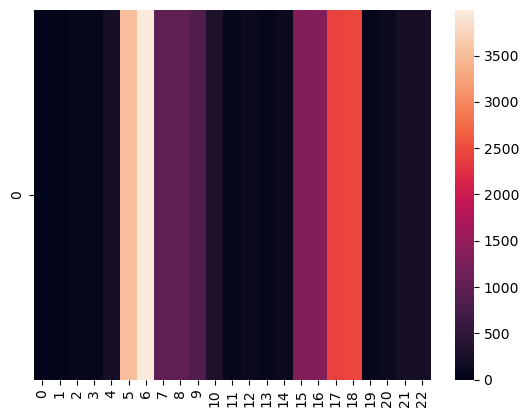

In [14]:
sns.heatmap(missing_values)
plt.show()

In [15]:
df.fillna(method='ffill', inplace=True)

In [16]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation      907
Sunshine         907
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           2
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
dtype: int64

There are 907 rows in Evaporatin and Sunshine and 2 rows in Cloud3pm column which cannot be filled bt fillna method so we will remoce those rows

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [20]:
df.shape

(7518, 23)

In [21]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [22]:
df['Location'].nunique()

11

In [23]:
df['Location'].unique().tolist()

['CoffsHarbour',
 'Newcastle',
 'Penrith',
 'Williamtown',
 'Wollongong',
 'Melbourne',
 'Brisbane',
 'Adelaide',
 'PerthAirport',
 'Darwin',
 'Uluru']

In [24]:
df['MinTemp'].nunique()

265

In [25]:
df['MaxTemp'].nunique()

303

In [26]:

df['Rainfall'].nunique()

243

In [27]:
df['Rainfall'].nunique()

243

In [28]:
df['Sunshine'].nunique()

140

In [29]:
df['WindGustDir'].nunique()

16

In [30]:
df['WindGustSpeed'].nunique()

51

In [31]:
df['WindDir9am'].nunique()

16

In [32]:
df['WindDir3pm'].nunique()

16

In [33]:
df['WindSpeed9am'].nunique()

34

In [34]:
df['WindSpeed3pm'].nunique()

35

In [35]:
df['Humidity9am'].nunique()

90

In [36]:
df['Humidity3pm'].nunique()

94

In [37]:
df['Pressure9am'].nunique()

372

In [38]:
df['Pressure3pm'].nunique()

366

In [39]:
df['Cloud9am'].nunique()

9

In [40]:
df['Cloud3pm'].nunique()

9

In [41]:
df['Temp9am'].nunique()

279

In [42]:
df['Temp3pm'].nunique()

305

In [43]:
df['RainToday'].nunique()

2

In [44]:
df['RainToday'].unique()

array(['Yes', 'No'], dtype=object)

In [45]:
df['RainTomorrow'].nunique()

2

In [46]:
df['RainTomorrow'].unique()

array(['Yes', 'No'], dtype=object)

In [47]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

2011-11-08    4
2011-08-15    4
2011-08-25    4
2011-08-24    4
2011-08-23    4
             ..
2009-07-26    1
2012-11-11    1
2012-11-12    1
2012-11-13    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


12.0    72
13.2    67
12.7    65
14.2    65
13.8    64
        ..
26.9     1
0.4      1
25.9     1
0.0      1
26.0     1
Name: MinTemp, Length: 265, dtype: int64


19.0    77
23.8    75
19.8    71
25.0    67
20.0    66
        ..
39.5     1
41.5     1
39.4     1
43.5     1
43.0     1
Name: MaxTemp, Length: 303, dtype: int64


0.0     4838
0.2      365
0.4      158
0.6      113
1.2       80
        ... 
59.4       1
45.2       1
39.8       1
80.6       1
40.0       1
Name: Rainfall, Length: 243, dtype: int64


4.4   

In [48]:
#here we are applying nunique method to the whole dataset together
df.nunique().to_frame('No of unique values')

No of unique values
Date                          3004
Location                        11
MinTemp                        265
MaxTemp                        303
Rainfall                       243
Evaporation                    116
Sunshine                       140
WindGustDir                     16
WindGustSpeed                   51
WindDir9am                      16
WindDir3pm                      16
WindSpeed9am                    34
WindSpeed3pm                    35
Humidity9am                     90
Humidity3pm                     94
Pressure9am                    372
Pressure3pm                    366
Cloud9am                         9
Cloud3pm                         9
Temp9am                        279
Temp3pm                        305
RainToday                        2
RainTomorrow                     2

In [49]:
df['MinTemp'].mean()

13.570271348762997

In [50]:
df['MinTemp'].median()

13.6

In [51]:
df['MinTemp'].mode()

0    12.0
Name: MinTemp, dtype: float64

In [52]:
df['MinTemp'].min()

-0.7

In [53]:
df['MinTemp'].max()

28.5

In [54]:
df['MaxTemp'].mean()

23.987802607076404

In [55]:
df['MaxTemp'].median()

23.3

In [56]:
df['MaxTemp'].mode()

0    19.0
Name: MaxTemp, dtype: float64

In [57]:
df['MaxTemp'].min()

10.8

In [58]:
df['MaxTemp'].max()

45.5

In [59]:
df['Rainfall'].mean()

2.8892524607608676

In [60]:
df['Rainfall'].median()

0.0

In [61]:
df['Rainfall'].mode()

0    0.0
Name: Rainfall, dtype: float64

In [62]:
df['Rainfall'].min()

0.0

In [63]:
df['Rainfall'].max()

371.0

In [64]:
df['Evaporation'].mean()

9.850345836658652

In [65]:
df['Evaporation'].median()

4.4

In [66]:
df['Evaporation'].mode()

0    4.4
Name: Evaporation, dtype: float64

In [67]:
df['Evaporation'].max()

145.0

In [68]:
df['Evaporation'].min()

0.0

In [69]:
df['Sunshine'].mean()

8.117970204842027

In [70]:
df['Sunshine'].median()

8.4

In [71]:
df['Sunshine'].mode()

0    11.1
Name: Sunshine, dtype: float64

In [72]:
df['Sunshine'].min()

0.0

In [73]:
df['Sunshine'].max()

13.9

In [74]:
df['WindGustDir'].mode()

0    NNE
Name: WindGustDir, dtype: object

In [75]:
df['WindGustDir'].min()

'E'

In [76]:
df['WindGustDir'].max()

'WSW'

In [77]:
df['WindGustSpeed'].mean()

42.4096834264432

In [78]:
df['WindGustSpeed'].mode()

0    52.0
Name: WindGustSpeed, dtype: float64

In [79]:
df['WindGustSpeed'].median()

41.0

In [80]:
df['WindGustSpeed'].max()

102.0

In [81]:
df['WindGustSpeed'].min()

7.0

In [82]:
df['WindDir9am'].mode()

0    N
Name: WindDir9am, dtype: object

In [83]:
df['WindDir9am'].max()

'WSW'

In [84]:
df['WindDir9am'].min()

'E'

In [85]:
df['WindSpeed3pm'].mode()

0    9.0
Name: WindSpeed3pm, dtype: float64

In [86]:
df['WindSpeed3pm'].min()

0.0

In [87]:
df['WindSpeed3pm'].max()

83.0

In [88]:
df['WindSpeed3pm'].max()

83.0

In [89]:
df['Humidity9am'].mean()

67.30566640063847

In [90]:
df['Humidity9am'].median()

68.0

In [91]:
df['Humidity9am'].mode()


0    62.0
Name: Humidity9am, dtype: float64

In [92]:
df['Humidity9am'].mode()

0    62.0
Name: Humidity9am, dtype: float64

In [93]:
df['Humidity9am'].max()

100.0

In [94]:
df['Humidity9am'].min()

10.0

In [95]:
df['Humidity3pm'].mean()

51.70603884011705

In [96]:
df['Humidity3pm'].median()

51.0

In [97]:
df['Humidity3pm'].mode()

0    48.0
Name: Humidity3pm, dtype: float64

In [98]:
df['Humidity3pm'].max()

99.0

In [99]:
df['Humidity3pm'].min()

6.0

In [100]:
df['Pressure9am'].mean()

1018.859071561593

In [101]:
df['Pressure9am'].median()

1019.4

In [102]:
df['Pressure9am'].mode()

0    1024.6
Name: Pressure9am, dtype: float64

In [103]:
df['Pressure9am'].min()

992.9

In [104]:
df['Pressure9am'].max()

1039.0

In [105]:
df['Pressure3pm'].mean()

1016.1135674381567

In [106]:
df['Pressure3pm'].median()

1017.1

In [107]:
df['Pressure3pm'].mode()

0    1020.1
Name: Pressure3pm, dtype: float64

In [108]:
df['Pressure3pm'].max()

1036.0

In [109]:
df['Pressure3pm'].min()

990.7

In [110]:
df['Cloud9am'].mean()

4.5252726789039635

In [111]:
df['Cloud9am'].median()

6.0

In [112]:
df['Cloud9am'].mode()

0    7.0
Name: Cloud9am, dtype: float64

In [113]:
df['Cloud9am'].max()

8.0

In [114]:
df['Cloud9am'].min()

0.0

In [115]:
df['Cloud3pm'].mean()

4.320696993881351

In [116]:
df['Cloud3pm'].median()

5.0

In [117]:
df['Cloud3pm'].mode()

0    1.0
Name: Cloud3pm, dtype: float64

In [118]:
df['Cloud3pm'].max()

8.0

In [119]:
df['Cloud3pm'].min()

0.0

In [120]:
df['Temp9am'].mean()

18.14950784783188

In [121]:
df['Temp9am'].median()

18.1

In [122]:
df['Temp9am'].mode()

0    14.8
Name: Temp9am, dtype: float64

In [123]:
df['Temp9am'].max()

39.4

In [124]:
df['Temp9am'].min()

4.5

In [125]:
df['Temp3pm'].mean()

22.549574354881628

In [126]:
df['Temp3pm'].median()

22.0

In [127]:
df['Temp3pm'].mode()

0    26.0
Name: Temp3pm, dtype: float64

In [128]:
df['Temp3pm'].max()

44.1

In [129]:
df['Temp3pm'].min()

9.3

In [130]:
df['RainToday'].max()

'Yes'

In [131]:
df['RainToday'].min()

'No'

In [132]:
df['RainTomorrow'].max()

'Yes'

In [133]:
df['RainTomorrow'].min()

'No'

In [134]:
df.RainToday.value_counts()

No     5666
Yes    1852
Name: RainToday, dtype: int64

In [135]:
df.RainTomorrow.value_counts()

No     5665
Yes    1853
Name: RainTomorrow, dtype: int64

In [136]:
df.RainToday.isnull().sum()

0

In [137]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation    Sunshine  \
count  7518.000000  7518.000000  7518.000000  7518.000000  7518.00000   
mean     13.570271    23.987803     2.889252     9.850346     8.11797   
std       5.151452     5.866102    10.728628    13.740177     3.41355   
min      -0.700000    10.800000     0.000000     0.000000     0.00000   
25%       9.700000    19.600000     0.000000     3.400000     6.80000   
50%      13.600000    23.300000     0.000000     4.400000     8.40000   
75%      17.600000    27.900000     1.000000     7.600000    11.10000   
max      28.500000    45.500000   371.000000   145.000000    13.90000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7518.000000   7518.000000   7518.000000  7518.000000  7518.000000   
mean       42.409683     14.469673     19.155493    67.305666    51.706039   
std        14.238500     10.295298     10.048474    16.655225    18.205420   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      7.000000     11.000000    56.000000    39.000000   
50%        41.000000     13.000000     19.000000    68.000000    51.000000   
75%        52.000000     20.000000     26.000000    79.000000    64.000000   
max       102.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7518.000000  7518.000000  7518.000000  7518.000000  7518.000000   
mean   1018.859072  1016.113567     4.525273     4.320697    18.149508   
std       6.698429     6.380350     3.023976     2.736142     5.370209   
min     992.900000   990.700000     0.000000     0.000000     4.500000   
25%    1014.100000  1011.525000     1.000000     1.000000    14.200000   
50%    1019.400000  1017.100000     6.000000     5.000000    18.100000   
75%    1024.600000  1020.100000     7.000000     7.000000    22.175000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  7518.000000  
mean     22.549574  
std       5.714306  
min       9.300000  
25%      18.400000  
50%      22.000000  
75%      26.200000  
max      44.100000

# Data Visualization

Univariate Analysis

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

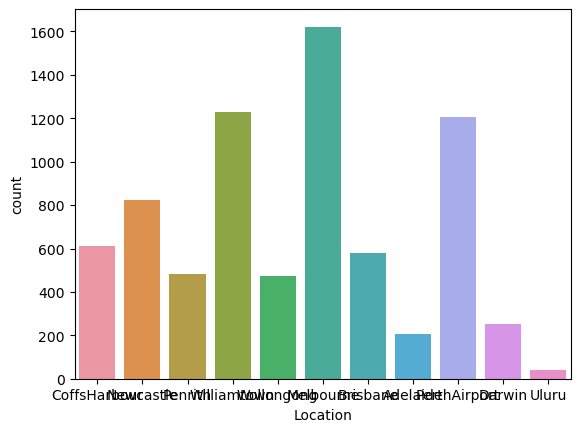

In [138]:
sns.countplot(df['Location'])
df['Location'].value_counts()

12.0    72
13.2    67
12.7    65
14.2    65
13.8    64
        ..
26.9     1
0.4      1
25.9     1
0.0      1
26.0     1
Name: MinTemp, Length: 265, dtype: int64

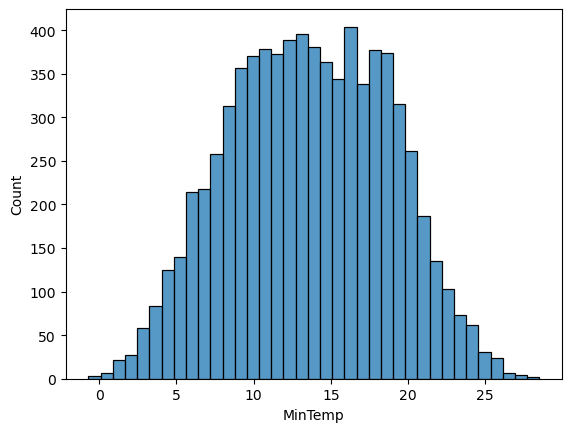

In [139]:
sns.histplot(df['MinTemp'])
df['MinTemp'].value_counts()

12.0    72
13.2    67
12.7    65
14.2    65
13.8    64
        ..
26.9     1
0.4      1
25.9     1
0.0      1
26.0     1
Name: MinTemp, Length: 265, dtype: int64

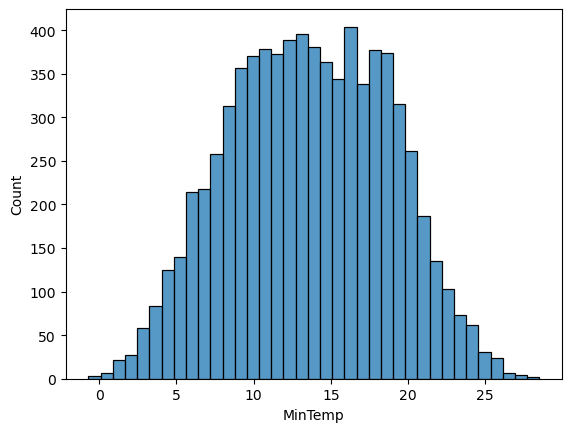

In [140]:
sns.histplot(df['MinTemp'])
df['MinTemp'].value_counts()

19.0    77
23.8    75
19.8    71
25.0    67
20.0    66
        ..
39.5     1
41.5     1
39.4     1
43.5     1
43.0     1
Name: MaxTemp, Length: 303, dtype: int64

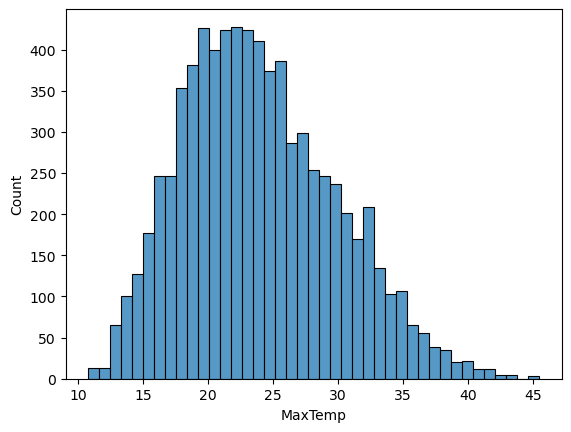

In [141]:
sns.histplot(df['MaxTemp'])
df['MaxTemp'].value_counts()

0.0     4838
0.2      365
0.4      158
0.6      113
1.2       80
        ... 
59.4       1
45.2       1
39.8       1
80.6       1
40.0       1
Name: Rainfall, Length: 243, dtype: int64

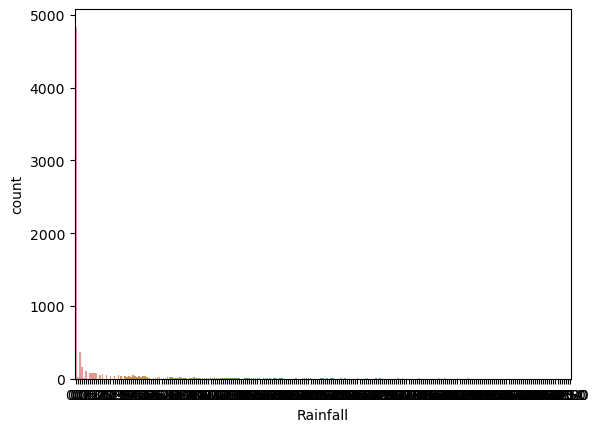

In [142]:
sns.countplot(df['Rainfall'])
df['Rainfall'].value_counts()

4.4     1403
47.0     828
4.0      188
3.0      173
7.0      165
        ... 
17.6       1
17.0       1
22.4       1
19.2       1
0.7        1
Name: Evaporation, Length: 116, dtype: int64

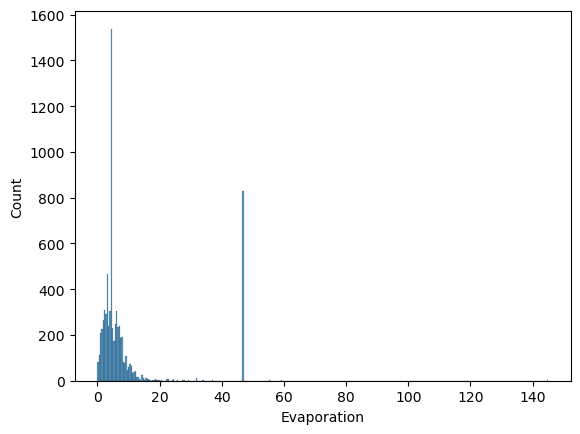

In [143]:
sns.histplot(df['Evaporation'])
df['Evaporation'].value_counts()

11.1    1372
7.4     1367
4.3      219
0.0      189
11.0      76
        ... 
2.5        8
13.6       7
13.8       4
13.9       3
13.5       2
Name: Sunshine, Length: 140, dtype: int64

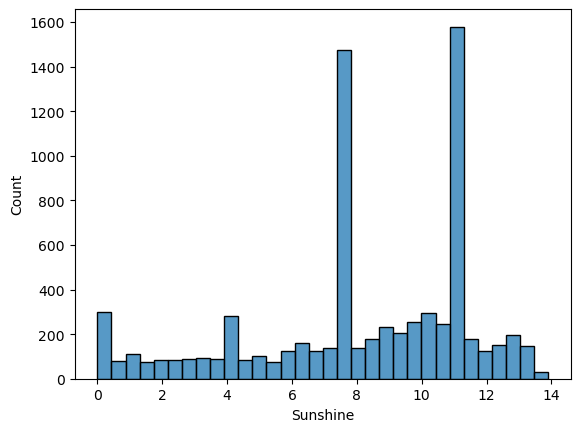

In [144]:
sns.histplot(df['Sunshine'])
df['Sunshine'].value_counts()

NNE    1129
N       673
S       569
SW      542
E       535
SSE     512
WSW     451
WNW     436
SE      426
SSW     395
ENE     384
W       355
NW      354
NE      306
ESE     270
NNW     181
Name: WindGustDir, dtype: int64

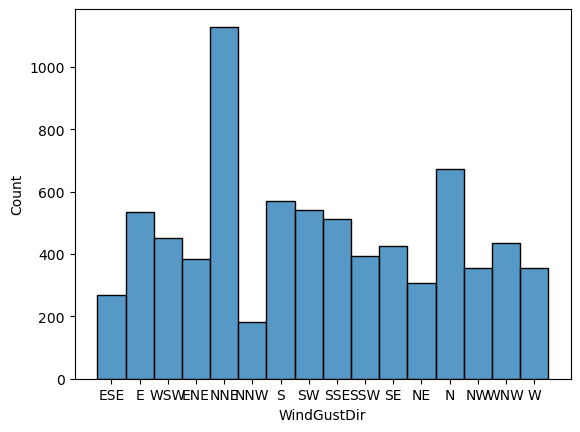

In [145]:
sns.histplot(df['WindGustDir'])
df['WindGustDir'].value_counts()

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Count'>

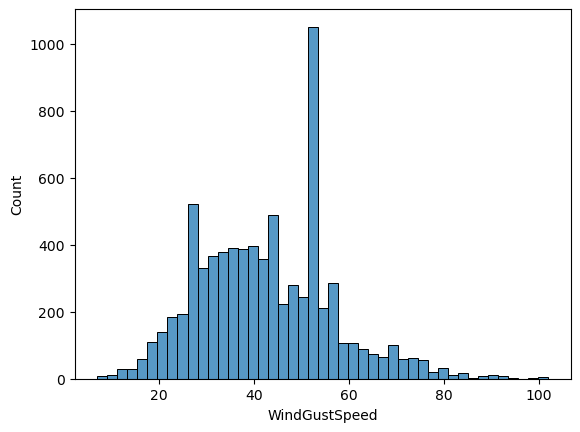

In [146]:
sns.histplot(df['WindGustSpeed'])

N      916
SW     824
NW     777
WSW    527
SSW    478
WNW    461
NE     459
SE     437
NNE    423
ENE    389
S      378
W      363
E      326
SSE    286
NNW    269
ESE    205
Name: WindDir9am, dtype: int64

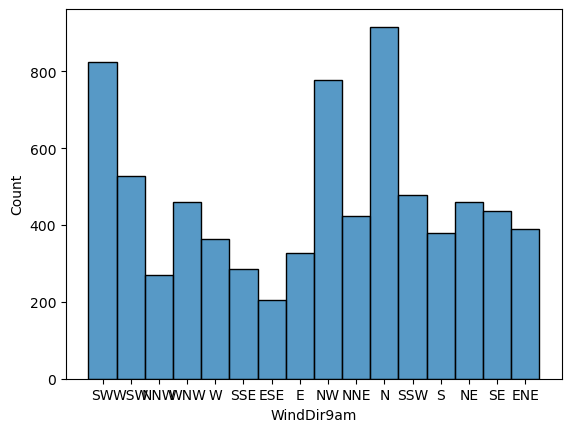

In [147]:
sns.histplot(df['WindDir9am'])
df['WindDir9am'].value_counts()

SE     843
S      691
SSE    564
SW     525
NE     522
WSW    500
N      483
NW     448
ESE    435
E      431
ENE    384
WNW    384
W      355
SSW    346
NNE    342
NNW    265
Name: WindDir3pm, dtype: int64

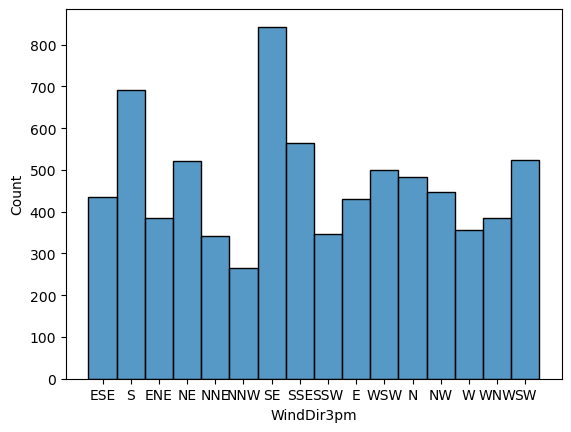

In [148]:
sns.histplot(df['WindDir3pm'])
df['WindDir3pm'].value_counts()

9.0     729
13.0    675
0.0     612
11.0    547
4.0     539
7.0     454
17.0    449
15.0    432
6.0     405
20.0    398
19.0    392
24.0    310
22.0    269
28.0    227
2.0     198
26.0    198
31.0    152
30.0    112
35.0     75
33.0     69
37.0     57
41.0     49
39.0     35
44.0     29
43.0     28
46.0     26
52.0     16
50.0     10
56.0      8
54.0      6
48.0      6
61.0      2
57.0      2
63.0      2
Name: WindSpeed9am, dtype: int64

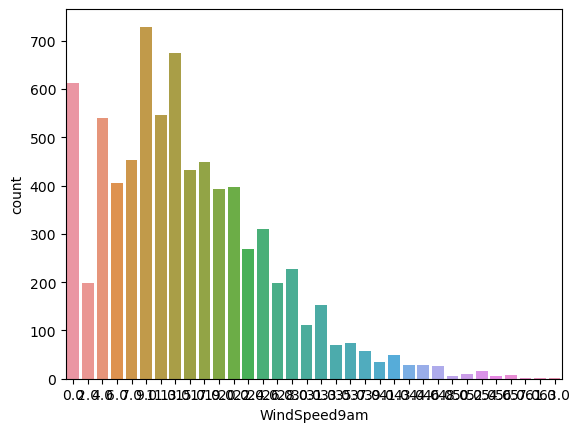

In [149]:
sns.countplot(df['WindSpeed9am'])
df['WindSpeed9am'].value_counts()

9.0     611
19.0    596
20.0    542
13.0    514
17.0    489
24.0    477
15.0    459
28.0    448
11.0    422
22.0    420
26.0    361
4.0     272
30.0    260
31.0    259
7.0     245
6.0     195
0.0     192
33.0    165
35.0    133
37.0    126
39.0     79
46.0     65
2.0      46
41.0     45
43.0     34
44.0     18
50.0     11
48.0     10
52.0      9
56.0      7
54.0      2
61.0      2
57.0      2
65.0      1
83.0      1
Name: WindSpeed3pm, dtype: int64

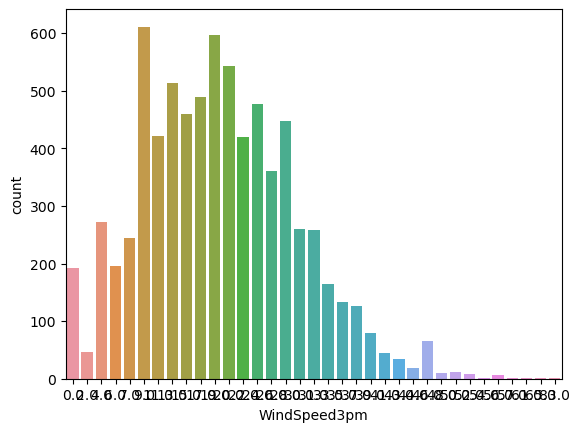

In [150]:
sns.countplot(df['WindSpeed3pm'])
df['WindSpeed3pm'].value_counts()

62.0    195
68.0    188
73.0    186
74.0    182
67.0    179
       ... 
17.0      2
14.0      2
16.0      2
10.0      1
15.0      1
Name: Humidity9am, Length: 90, dtype: int64

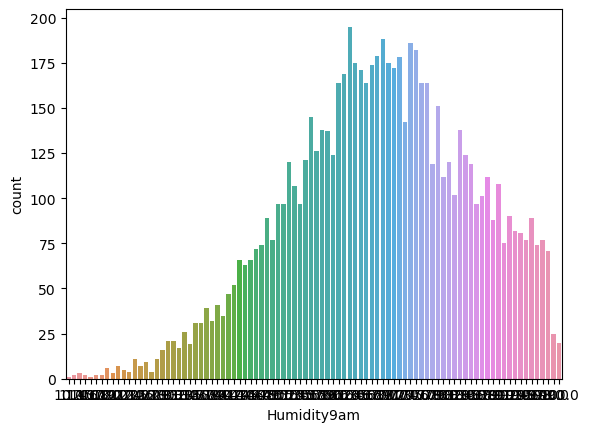

In [151]:
sns.countplot(df['Humidity9am'])
df['Humidity9am'].value_counts()

62.0    195
68.0    188
73.0    186
74.0    182
67.0    179
       ... 
17.0      2
14.0      2
16.0      2
10.0      1
15.0      1
Name: Humidity9am, Length: 90, dtype: int64

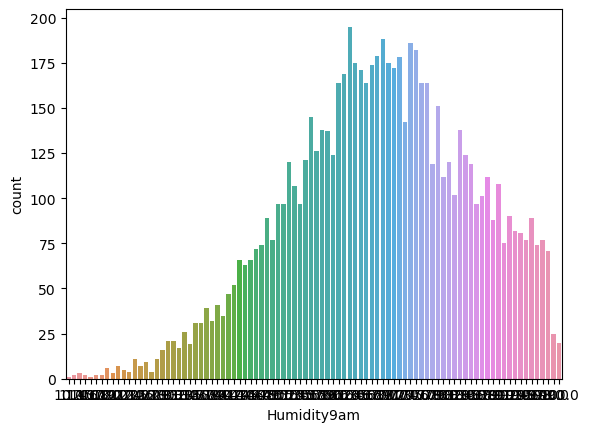

In [152]:
sns.countplot(df['Humidity9am'])
df['Humidity9am'].value_counts()

48.0    179
53.0    178
54.0    178
55.0    176
46.0    176
       ... 
98.0      7
7.0       7
8.0       4
6.0       3
99.0      1
Name: Humidity3pm, Length: 94, dtype: int64

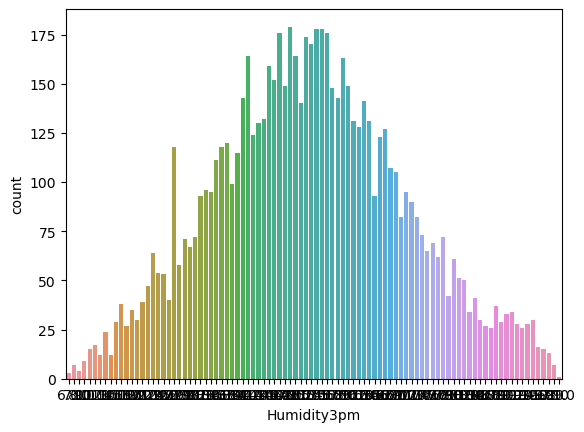

In [153]:
sns.countplot(df['Humidity3pm'])
df['Humidity3pm'].value_counts()

1024.6    1330
1014.8      56
1019.2      49
1016.1      48
1019.6      47
          ... 
1003.7       1
1003.8       1
1029.1       1
1033.8       1
1033.6       1
Name: Pressure9am, Length: 372, dtype: int64

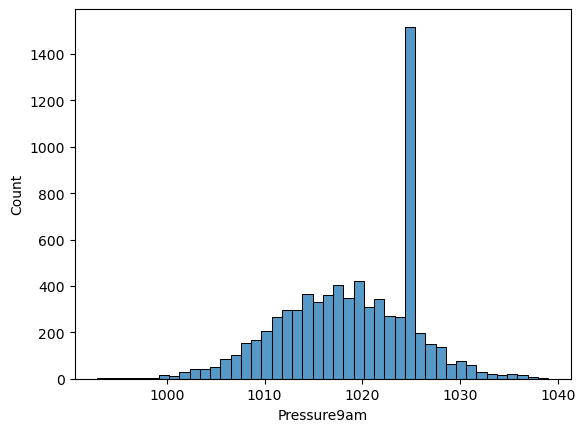

In [154]:
sns.histplot(df['Pressure9am'])
df['Pressure9am'].value_counts()

1020.1    1331
1017.8      56
1017.9      50
1018.0      50
1019.8      50
          ... 
1032.2       1
1001.8       1
999.5        1
999.1        1
1029.5       1
Name: Pressure3pm, Length: 366, dtype: int64

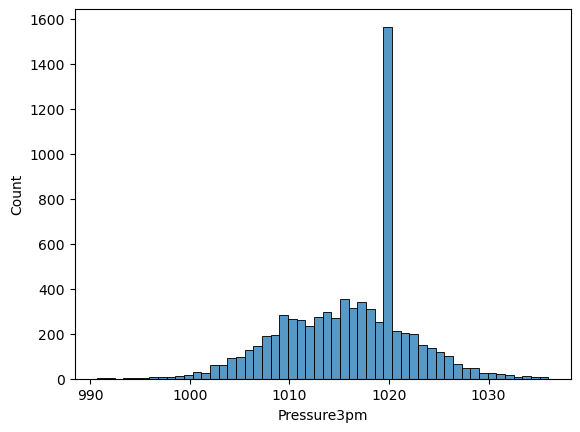

In [155]:
sns.histplot(df['Pressure3pm'])
df['Pressure3pm'].value_counts()

7.0    1619
8.0    1532
1.0    1122
0.0    1045
6.0     637
3.0     454
5.0     430
2.0     370
4.0     309
Name: Cloud9am, dtype: int64

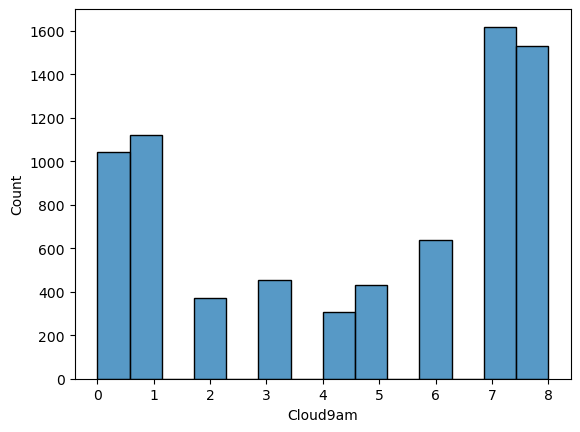

In [156]:
sns.histplot(df['Cloud9am'])
df['Cloud9am'].value_counts()

1.0    1727
7.0    1556
8.0     985
5.0     762
6.0     640
2.0     569
3.0     512
4.0     415
0.0     352
Name: Cloud3pm, dtype: int64

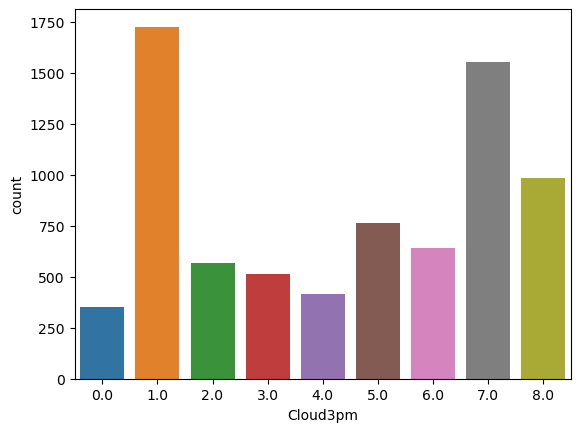

In [157]:
sns.countplot(df['Cloud3pm'])
df['Cloud3pm'].value_counts()

14.8    72
17.5    66
13.8    65
18.3    65
23.0    64
        ..
33.5     1
6.5      1
5.3      1
5.7      1
30.2     1
Name: Temp9am, Length: 279, dtype: int64

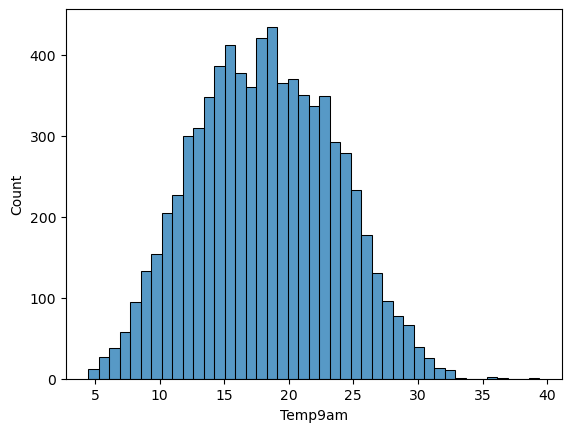

In [158]:
sns.histplot(df['Temp9am'])
df['Temp9am'].value_counts()

26.0    85
19.2    78
22.5    76
19.0    72
18.5    71
        ..
40.5     1
42.4     1
39.1     1
37.4     1
39.5     1
Name: Temp3pm, Length: 305, dtype: int64

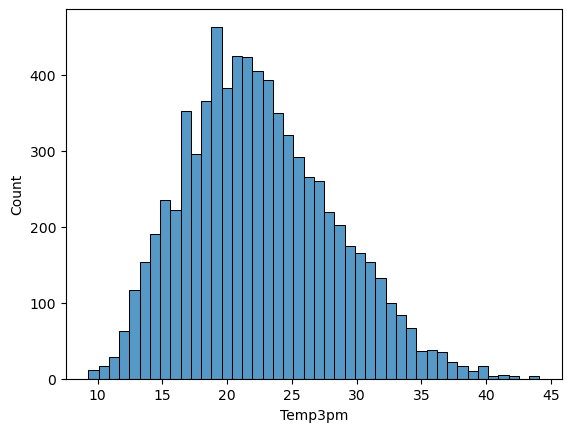

In [159]:
sns.histplot(df['Temp3pm'])
df['Temp3pm'].value_counts()

No     5666
Yes    1852
Name: RainToday, dtype: int64

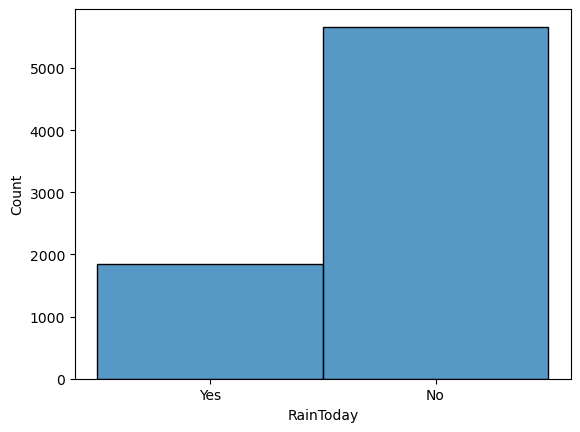

In [160]:
sns.histplot(df['RainToday'])
df['RainToday'].value_counts()

No     5665
Yes    1853
Name: RainTomorrow, dtype: int64

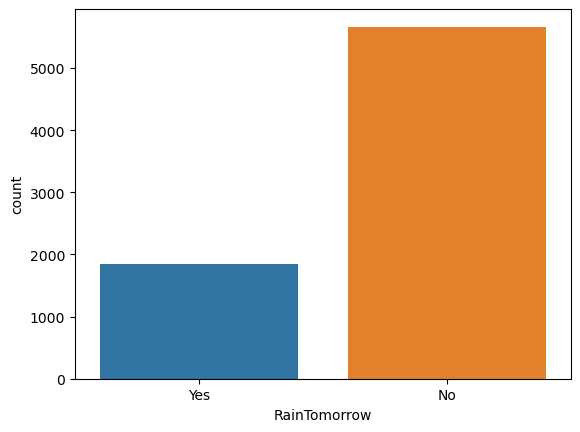

In [161]:
sns.countplot(df['RainTomorrow'])
df['RainTomorrow'].value_counts()

# Bivariate Analysis

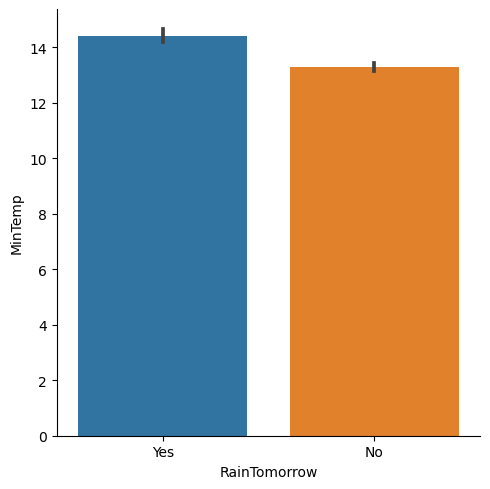

In [162]:
sns.catplot(y='MinTemp',x='RainTomorrow',data=df,kind='bar')
plt.show()

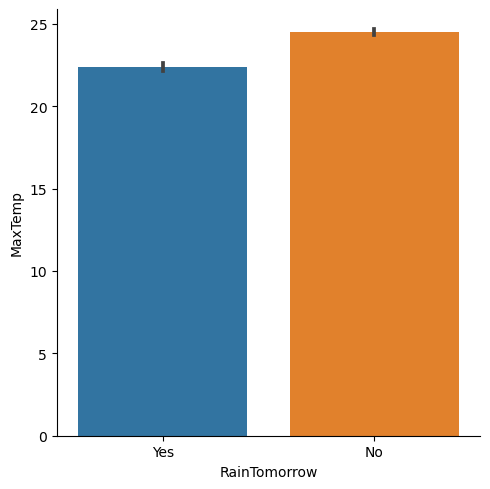

In [163]:
sns.catplot(y='MaxTemp',x='RainTomorrow',data=df,kind='bar')
plt.show()

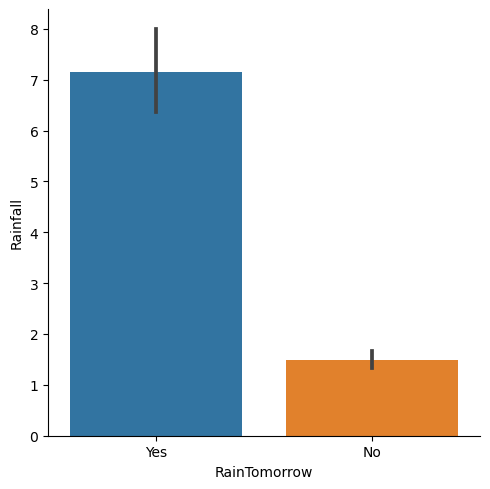

In [164]:
sns.catplot(y='Rainfall',x='RainTomorrow',data=df,kind='bar')
plt.show()

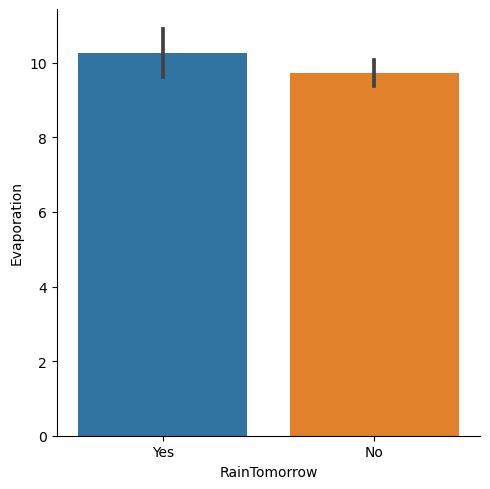

In [165]:
sns.catplot(y='Evaporation',x='RainTomorrow',data=df,kind='bar')
plt.show()

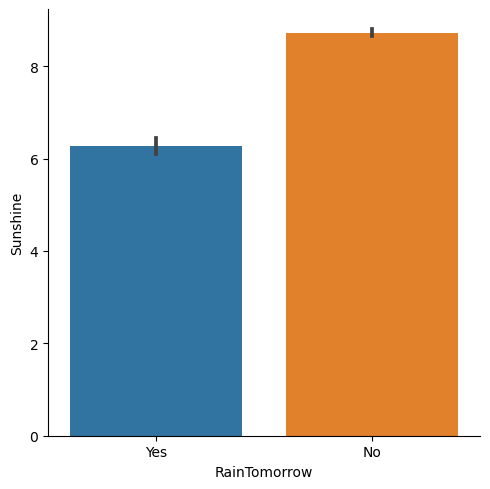

In [166]:
sns.catplot(y='Sunshine',x='RainTomorrow',data=df,kind='bar')
plt.show()

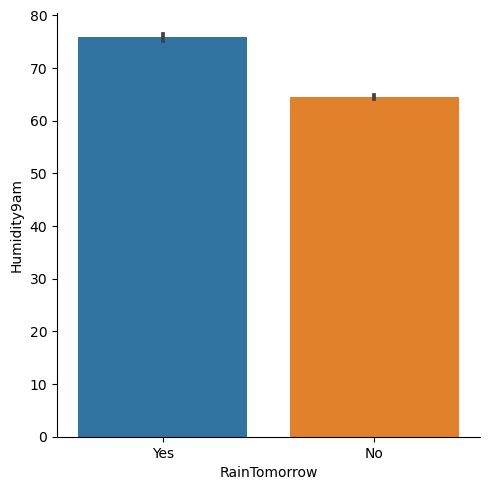

In [167]:
sns.catplot(y='Humidity9am',x='RainTomorrow',data=df,kind='bar')
plt.show()

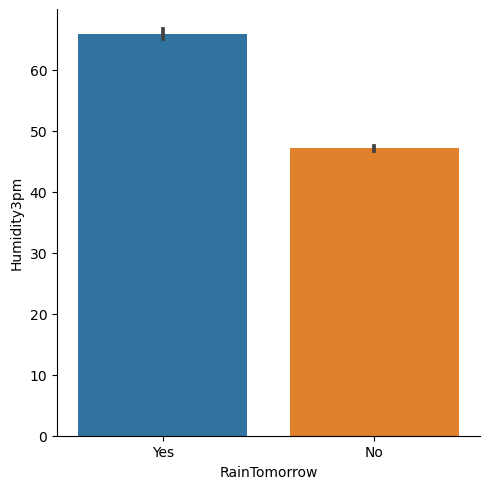

In [168]:
sns.catplot(y='Humidity3pm',x='RainTomorrow',data=df,kind='bar')
plt.show()

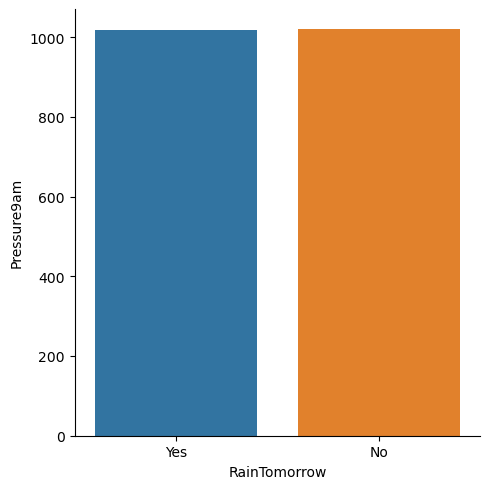

In [169]:
sns.catplot(y='Pressure9am',x='RainTomorrow',data=df,kind='bar')
plt.show()

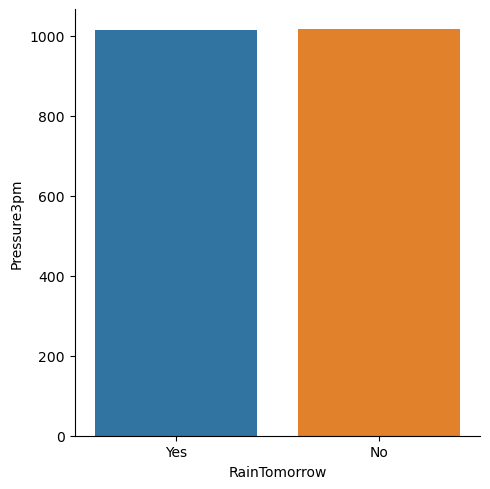

In [170]:
sns.catplot(y='Pressure3pm',x='RainTomorrow',data=df,kind='bar')
plt.show()

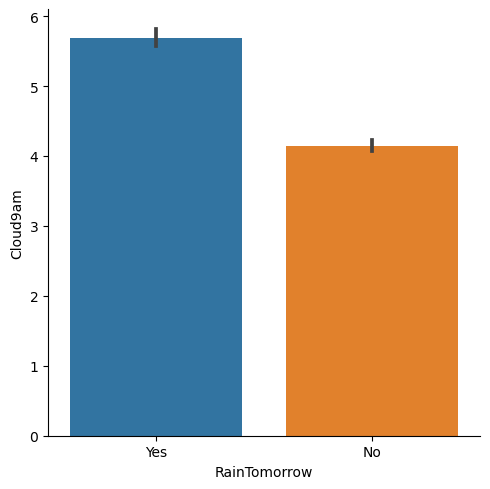

In [171]:
sns.catplot(y='Cloud9am',x='RainTomorrow',data=df,kind='bar')
plt.show()

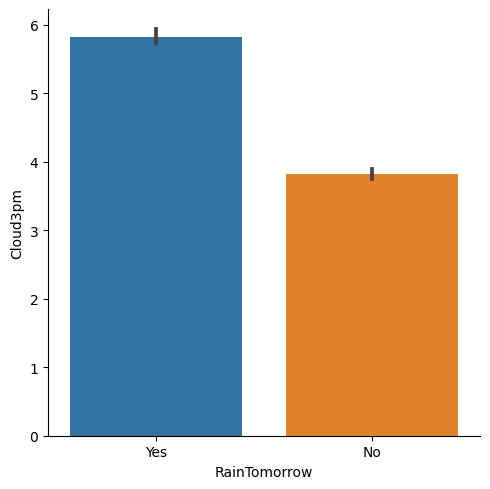

In [172]:
sns.catplot(y='Cloud3pm',x='RainTomorrow',data=df,kind='bar')
plt.show()

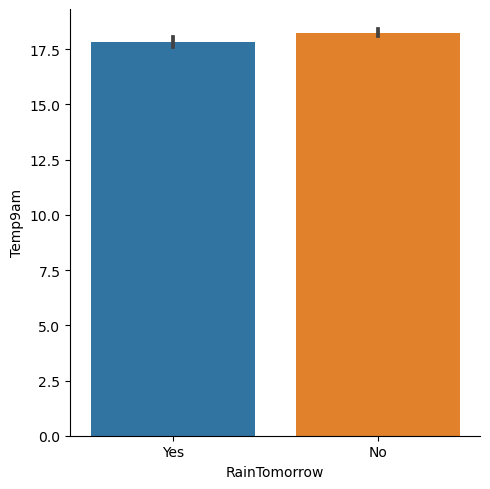

In [173]:
sns.catplot(y='Temp9am',x='RainTomorrow',data=df,kind='bar')
plt.show()

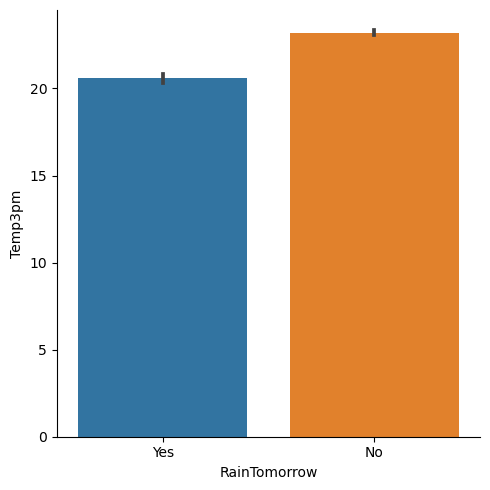

In [174]:
sns.catplot(y='Temp3pm',x='RainTomorrow',data=df,kind='bar')
plt.show()

# MULTIVARIATE ANALYSIS

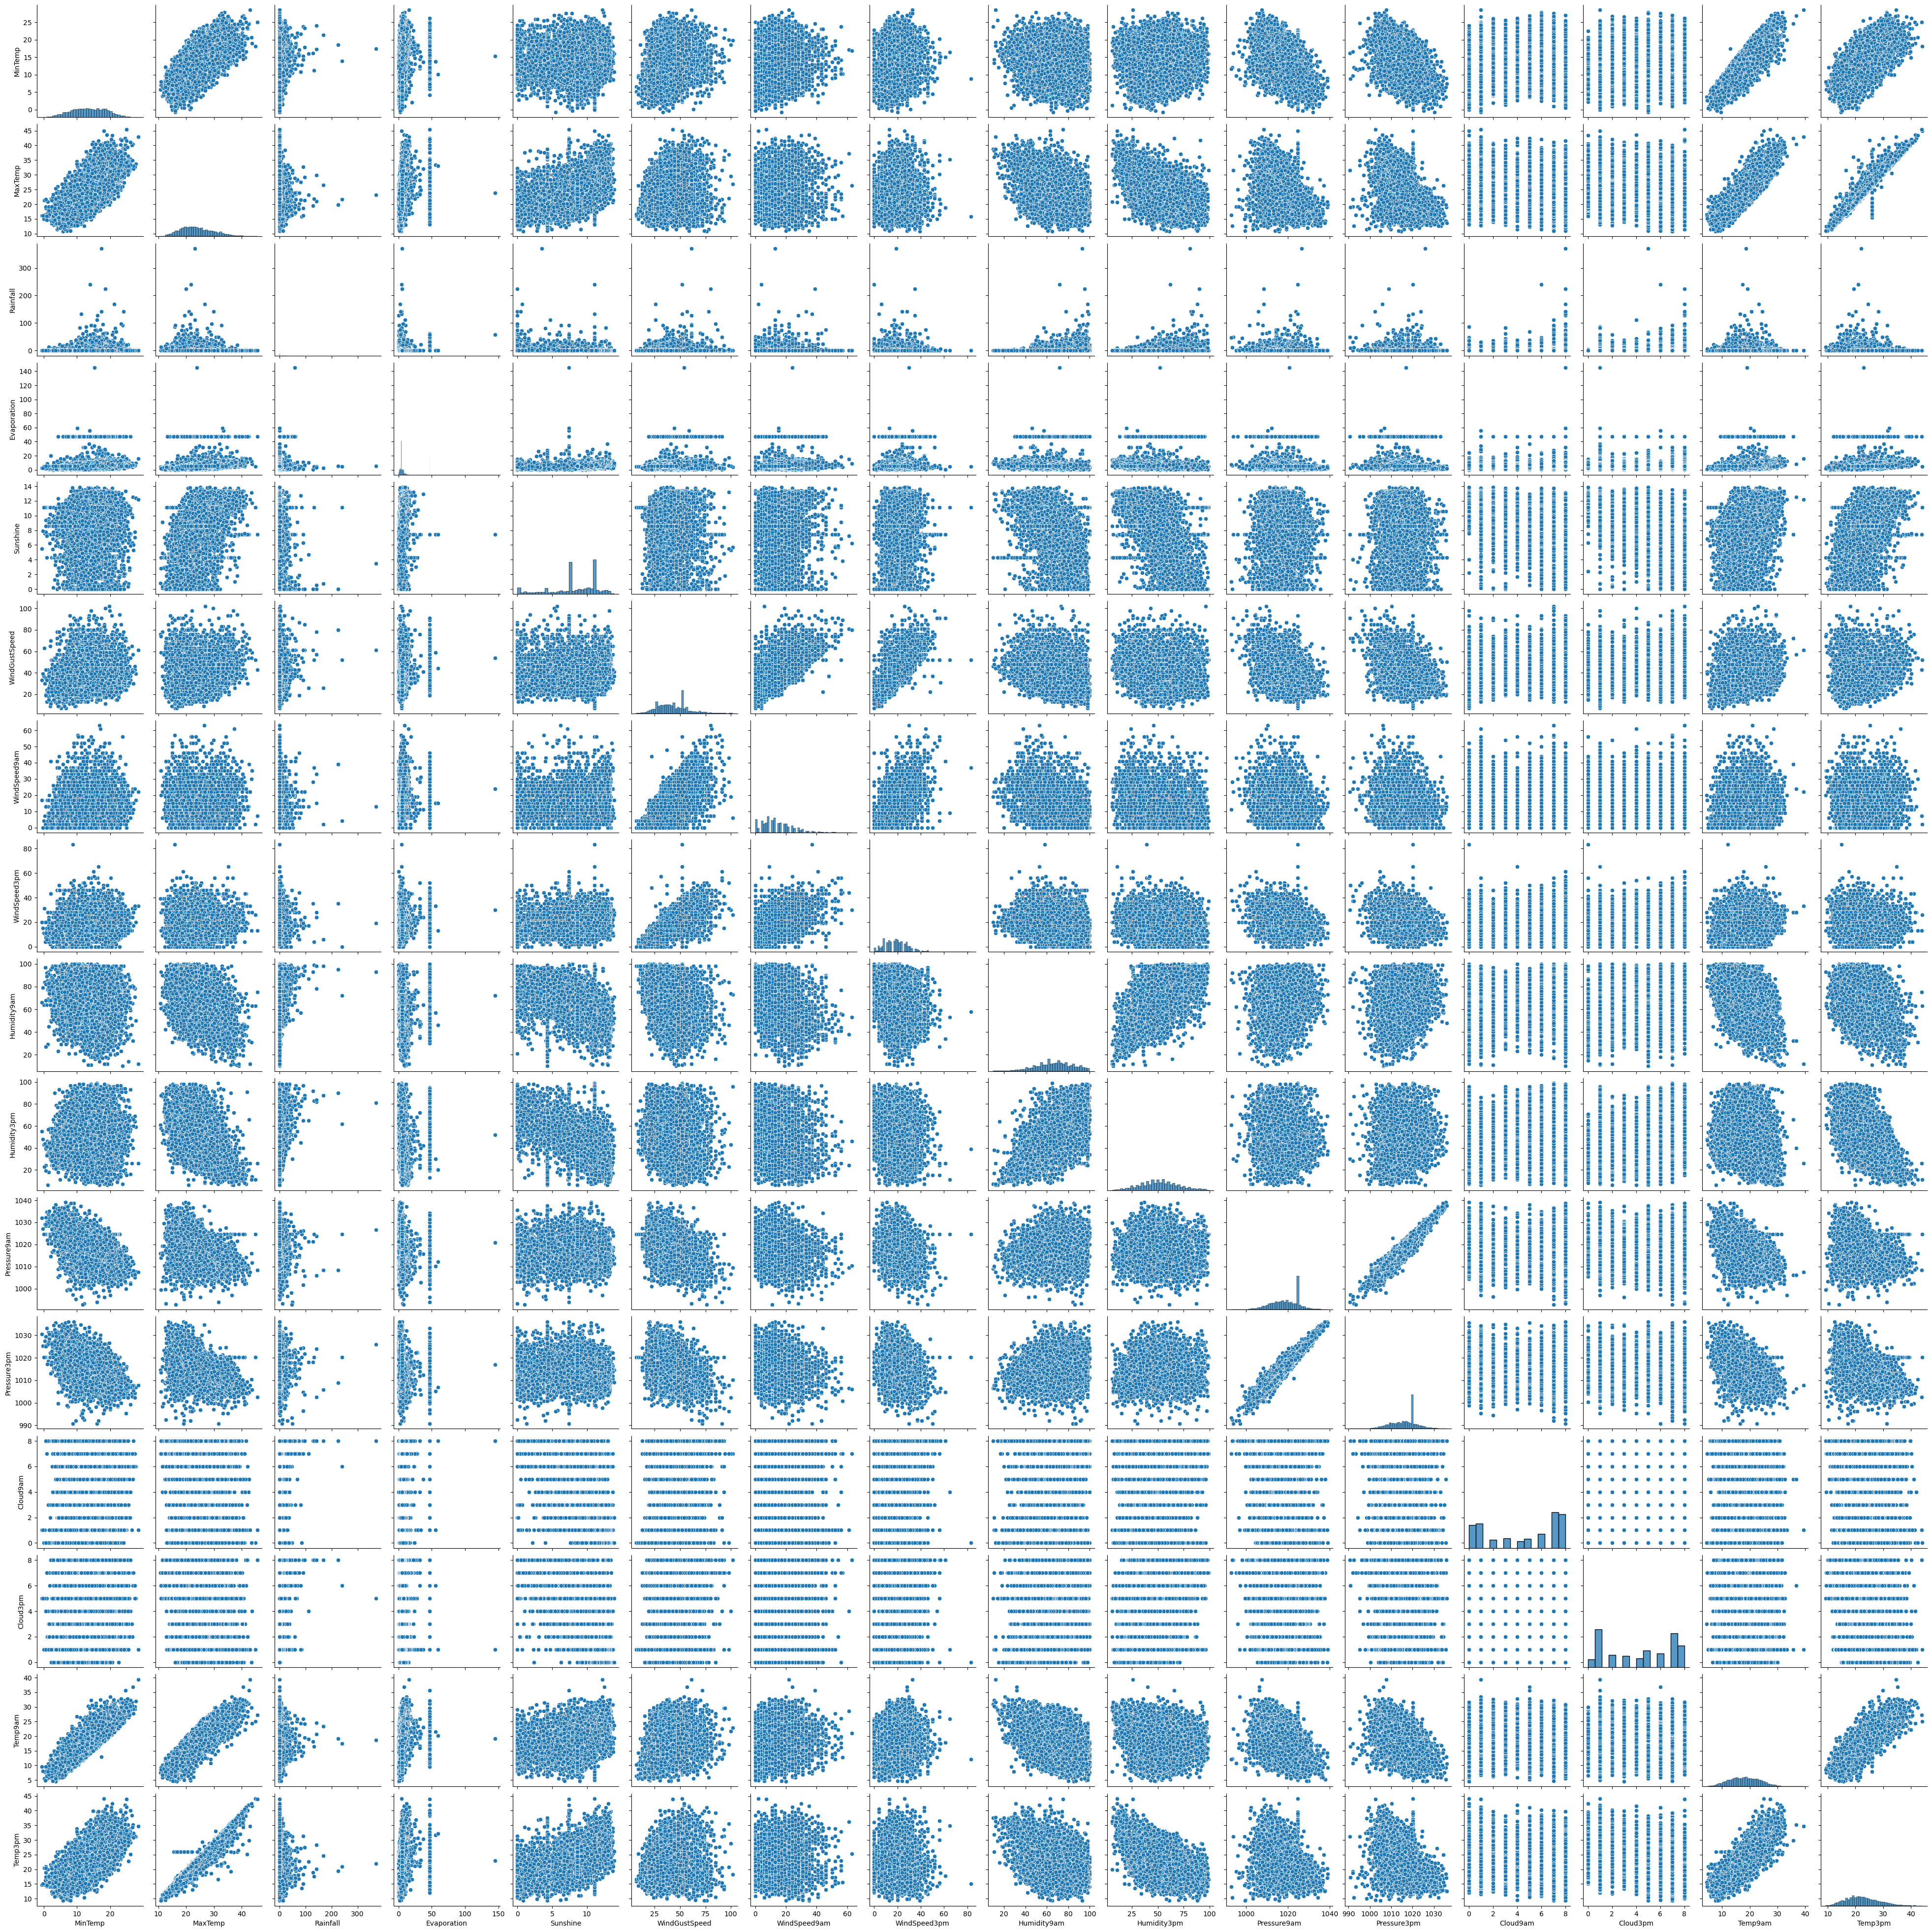

In [175]:
sns.pairplot(df)
plt.show()

# Separating Numerical and Categorical Columns

In [176]:
num_cols=df.select_dtypes(include=[np.number])
num_cols

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
907      19.8     27.1      24.4          8.6       9.0           35.0   
908      18.7     25.6       6.8          3.8       3.4           33.0   
909      16.5     25.5      16.8          2.8       6.1           19.0   
910      18.5     26.9       0.0          3.2      11.0           30.0   
911      18.2     28.2       0.0          6.8       9.0           50.0   
...       ...      ...       ...          ...       ...            ...   
8420      2.8     23.4       0.0          5.6       8.6           31.0   
8421      3.6     25.3       0.0          5.6       8.6           22.0   
8422      5.4     26.9       0.0          5.6       8.6           37.0   
8423      7.8     27.0       0.0          5.6       8.6           28.0   
8424     14.9     27.0       0.0          5.6       8.6           28.0   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
907           17.0          22.0         83.0         60.0       1018.9   
908           17.0          13.0         85.0         90.0       1020.7   
909            6.0           9.0         84.0         65.0       1021.5   
910            7.0          20.0         68.0         60.0       1018.9   
911           13.0          35.0         67.0         68.0       1016.3   
...            ...           ...          ...          ...          ...   
8420          13.0          11.0         51.0         24.0       1024.6   
8421          13.0           9.0         56.0         21.0       1023.5   
8422           9.0           9.0         53.0         24.0       1021.0   
8423          13.0           7.0         51.0         24.0       1019.4   
8424          17.0          17.0         62.0         36.0       1020.2   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
907        1017.9       6.0       6.0     22.0     26.0  
908        1020.1       4.0       7.0     21.0     20.9  
909        1020.1       5.0       7.0     21.0     24.5  
910        1016.6       2.0       5.0     23.3     26.4  
911        1012.8       1.0       1.0     24.0     25.9  
...           ...       ...       ...      ...      ...  
8420       1020.3       8.0       7.0     10.1     22.4  
8421       1019.1       8.0       7.0     10.9     24.5  
8422       1016.8       8.0       7.0     12.5     26.1  
8423       1016.5       3.0       2.0     15.1     26.0  
8424       1017.9       8.0       8.0     15.0     20.9  

[7518 rows x 16 columns]

In [177]:
cat_cols=df.select_dtypes(exclude=[np.number])
cat_cols

Date      Location WindGustDir WindDir9am WindDir3pm RainToday  \
907   2009-03-10  CoffsHarbour         ESE         SW        ESE       Yes   
908   2009-03-11  CoffsHarbour           E         SW          S       Yes   
909   2009-03-12  CoffsHarbour         WSW        WSW        ESE       Yes   
910   2009-03-13  CoffsHarbour         ENE         SW        ENE        No   
911   2009-03-14  CoffsHarbour         NNE        NNW         NE        No   
...          ...           ...         ...        ...        ...       ...   
8420  2017-06-21         Uluru           E         SE        ENE        No   
8421  2017-06-22         Uluru         NNW         SE          N        No   
8422  2017-06-23         Uluru           N         SE        WNW        No   
8423  2017-06-24         Uluru          SE        SSE          N        No   
8424  2017-06-25         Uluru          SE        ESE        ESE        No   

     RainTomorrow  
907           Yes  
908           Yes  
909            No  
910            No  
911           Yes  
...           ...  
8420           No  
8421           No  
8422           No  
8423           No  
8424           No  

[7518 rows x 7 columns]

In [178]:
corr=df.corr()
corr

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.705679  0.080575     0.211760  0.031407   
MaxTemp        0.705679  1.000000 -0.091585     0.075794  0.374968   
Rainfall       0.080575 -0.091585  1.000000     0.024285 -0.151404   
Evaporation    0.211760  0.075794  0.024285     1.000000 -0.017729   
Sunshine       0.031407  0.374968 -0.151404    -0.017729  1.000000   
WindGustSpeed  0.154594  0.103629  0.086593     0.079851  0.016952   
WindSpeed9am   0.083713 -0.003508  0.034533     0.101839 -0.168299   
WindSpeed3pm   0.126699  0.064332  0.014055     0.120253 -0.080459   
Humidity9am   -0.041114 -0.325460  0.239833     0.047469 -0.259445   
Humidity3pm    0.142813 -0.365825  0.237630     0.154494 -0.407341   
Pressure9am   -0.430717 -0.318421 -0.044036    -0.124279  0.166195   
Pressure3pm   -0.428393 -0.404234 -0.011723    -0.096278  0.071160   
Cloud9am       0.131542 -0.209441  0.139721     0.208603 -0.563628   
Cloud3pm       0.076634 -0.229888  0.141249     0.092803 -0.534076   
Temp9am        0.872341  0.867323 -0.017683     0.157825  0.214342   
Temp3pm        0.668508  0.969600 -0.094276     0.071226  0.396006   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.154594      0.083713      0.126699    -0.041114   
MaxTemp             0.103629     -0.003508      0.064332    -0.325460   
Rainfall            0.086593      0.034533      0.014055     0.239833   
Evaporation         0.079851      0.101839      0.120253     0.047469   
Sunshine            0.016952     -0.168299     -0.080459    -0.259445   
WindGustSpeed       1.000000      0.496689      0.542091    -0.208204   
WindSpeed9am        0.496689      1.000000      0.533248    -0.358817   
WindSpeed3pm        0.542091      0.533248      1.000000    -0.234024   
Humidity9am        -0.208204     -0.358817     -0.234024     1.000000   
Humidity3pm        -0.080653     -0.143306     -0.120000     0.625234   
Pressure9am        -0.320761     -0.299349     -0.323448     0.183080   
Pressure3pm        -0.308690     -0.231856     -0.259890     0.199652   
Cloud9am            0.097869      0.108579      0.111136     0.273401   
Cloud3pm            0.144275      0.143408      0.076885     0.247728   
Temp9am             0.128508      0.059207      0.137299    -0.311182   
Temp3pm             0.070119     -0.016960      0.061513    -0.316813   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.142813    -0.430717    -0.428393  0.131542  0.076634   
MaxTemp          -0.365825    -0.318421    -0.404234 -0.209441 -0.229888   
Rainfall          0.237630    -0.044036    -0.011723  0.139721  0.141249   
Evaporation       0.154494    -0.124279    -0.096278  0.208603  0.092803   
Sunshine         -0.407341     0.166195     0.071160 -0.563628 -0.534076   
WindGustSpeed    -0.080653    -0.320761    -0.308690  0.097869  0.144275   
WindSpeed9am     -0.143306    -0.299349    -0.231856  0.108579  0.143408   
WindSpeed3pm     -0.120000    -0.323448    -0.259890  0.111136  0.076885   
Humidity9am       0.625234     0.183080     0.199652  0.273401  0.247728   
Humidity3pm       1.000000    -0.002909     0.064612  0.381870  0.429038   
Pressure9am      -0.002909     1.000000     0.958934 -0.157680 -0.132487   
Pressure3pm       0.064612     0.958934     1.000000 -0.079279 -0.061179   
Cloud9am          0.381870    -0.157680    -0.079279  1.000000  0.565191   
Cloud3pm          0.429038    -0.132487    -0.061179  0.565191  1.000000   
Temp9am          -0.079269    -0.423569    -0.455256 -0.061893 -0.084953   
Temp3pm          -0.451401    -0.271337    -0.366537 -0.228305 -0.276955   

                Temp9am   Temp3pm  
MinTemp        0.872341  0.668508  
MaxTemp        0.867323  0.969600  
Rainfall      -0.017683 -0.094276  
Evaporation    0.157825  0.071226  
Sunshine       0.214342  0.396006  
WindGustSpeed  0.128508  0.070119  
WindSpeed9am   0.059207 -0.016960  
Wi

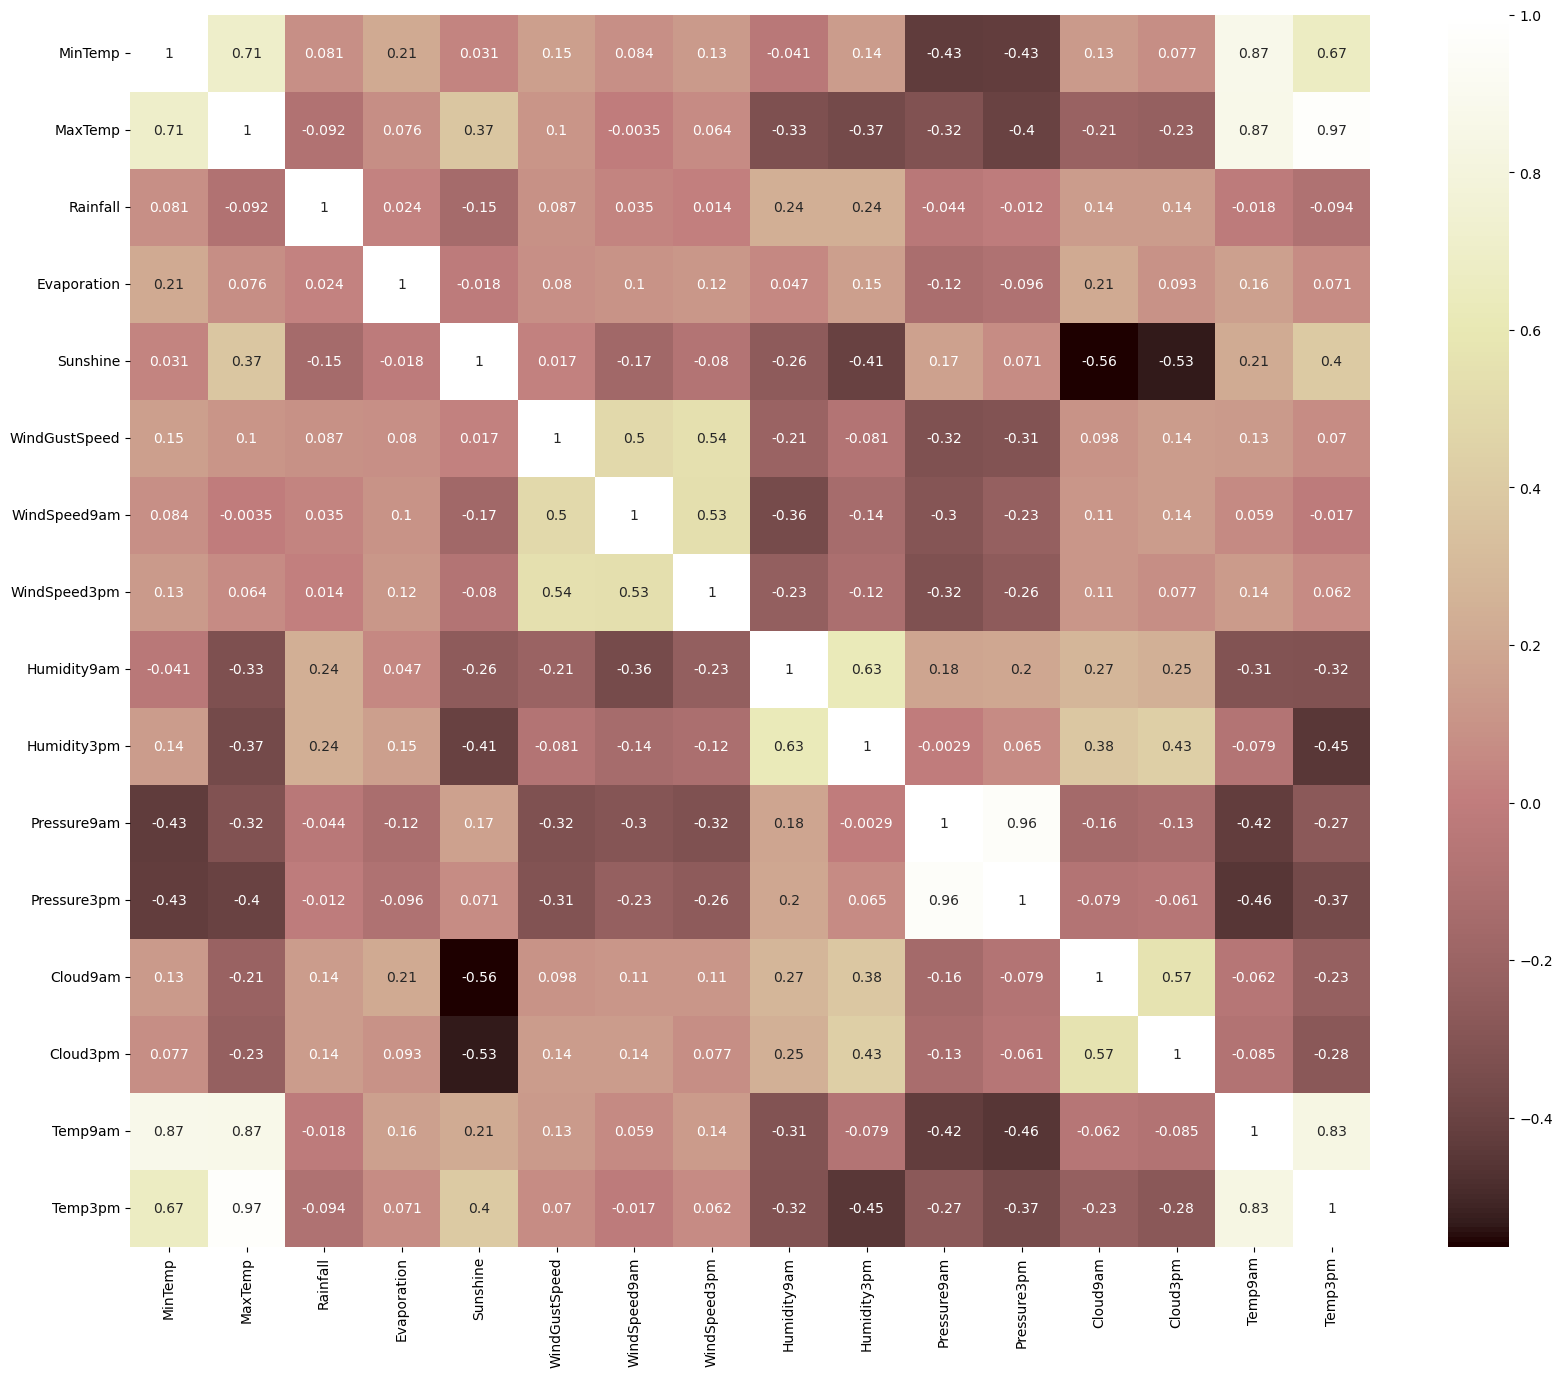

In [179]:
plt.figure(figsize=(20,16))
sns.heatmap(corr,cmap='pink',annot=True)
plt.show()

# Plotting Outliers

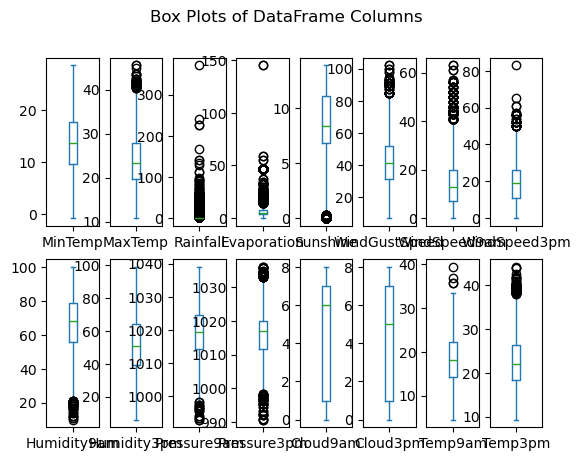

In [180]:
plt.figure
num_cols.plot(kind='box',subplots=True,layout=(2,8))
plt.suptitle("Box Plots of DataFrame Columns")
plt.tight_layout()
plt.show()

In [181]:
num_cols.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

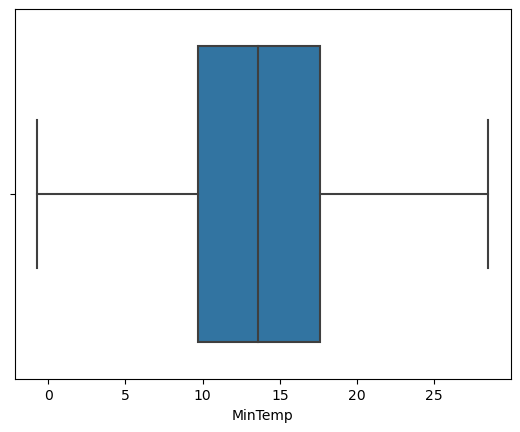

In [182]:
sns.boxplot(num_cols['MinTemp'])
plt.show()

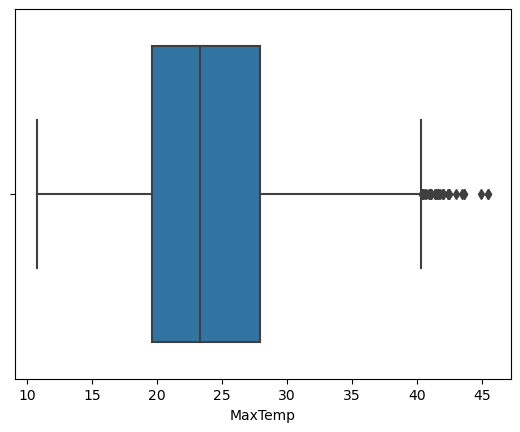

In [183]:
sns.boxplot(num_cols['MaxTemp'])
plt.show()

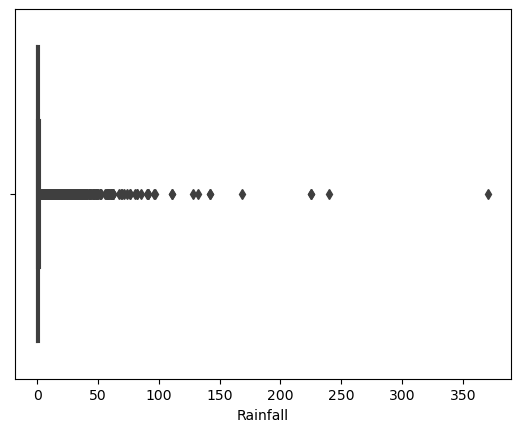

In [184]:
sns.boxplot(num_cols['Rainfall'])
plt.show()

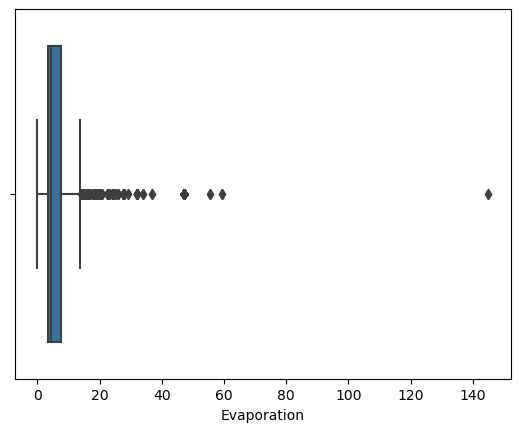

In [185]:
sns.boxplot(num_cols['Evaporation'])
plt.show()

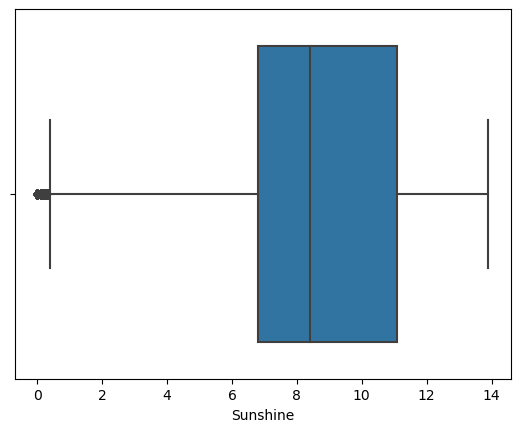

In [186]:
sns.boxplot(num_cols['Sunshine'])
plt.show()

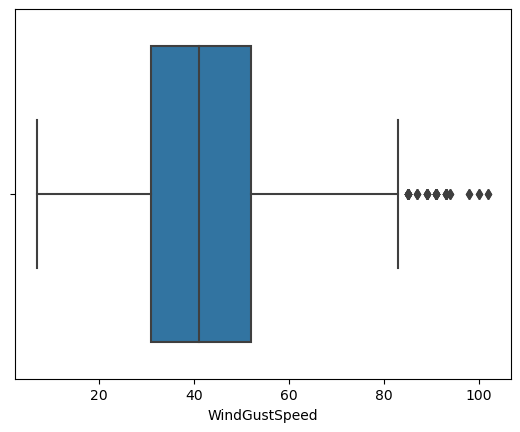

In [187]:
sns.boxplot(num_cols['WindGustSpeed'])
plt.show()

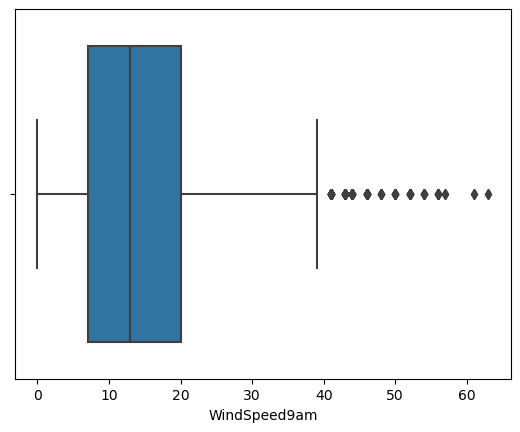

In [188]:
sns.boxplot(num_cols['WindSpeed9am'])
plt.show()

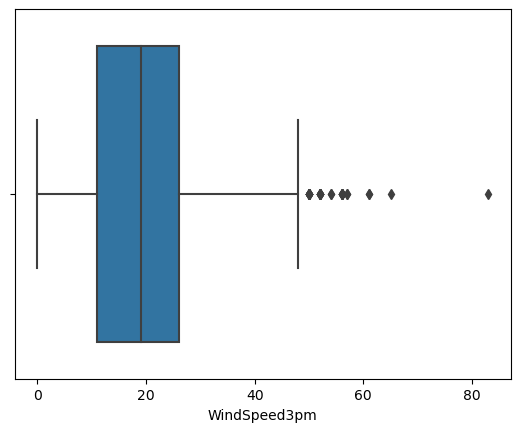

In [189]:
sns.boxplot(num_cols['WindSpeed3pm'])
plt.show()

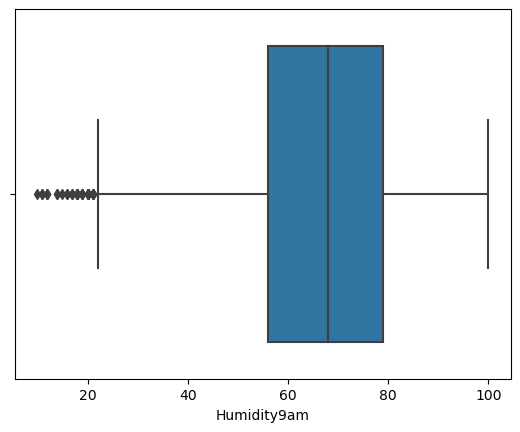

In [190]:
sns.boxplot(num_cols['Humidity9am'])
plt.show()

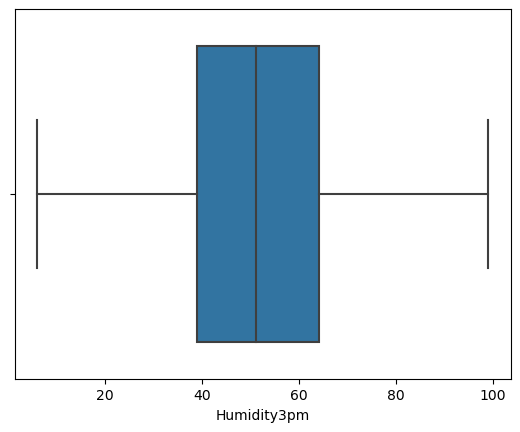

In [191]:
sns.boxplot(num_cols['Humidity3pm'])
plt.show()

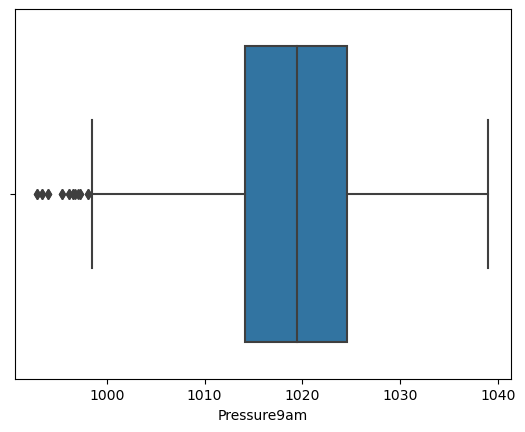

In [192]:
sns.boxplot(num_cols['Pressure9am'])
plt.show()

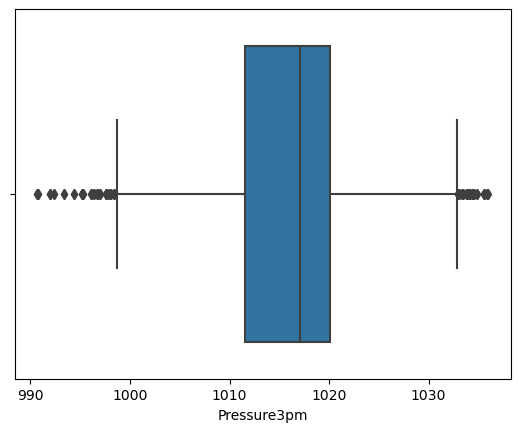

In [193]:
sns.boxplot(num_cols['Pressure3pm'])
plt.show()

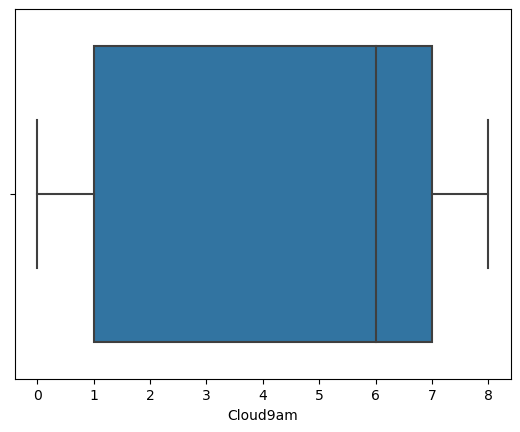

In [194]:
sns.boxplot(num_cols['Cloud9am'])
plt.show()

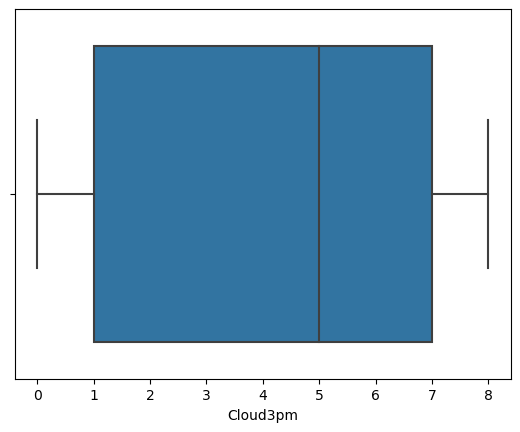

In [195]:
sns.boxplot(num_cols['Cloud3pm'])
plt.show()

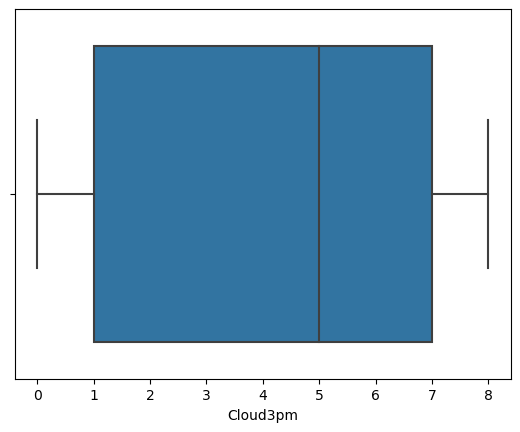

In [196]:
sns.boxplot(num_cols['Cloud3pm'])
plt.show()

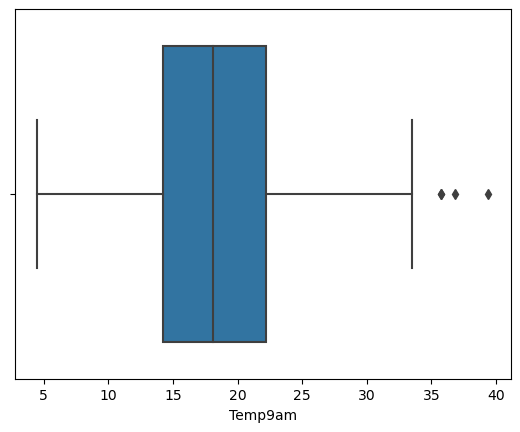

In [197]:
sns.boxplot(num_cols['Temp9am'])
plt.show()

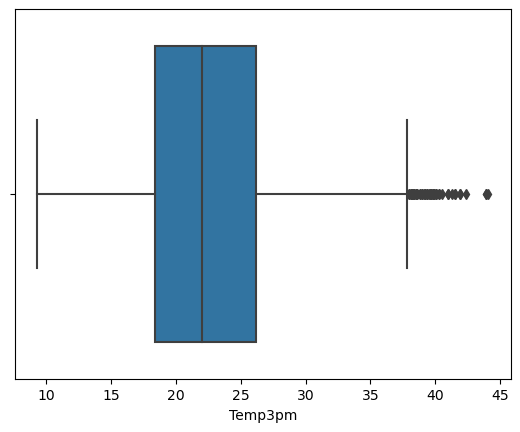

In [198]:
sns.boxplot(num_cols['Temp3pm'])
plt.show()

# Checking Skewness

In [199]:
num_cols.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

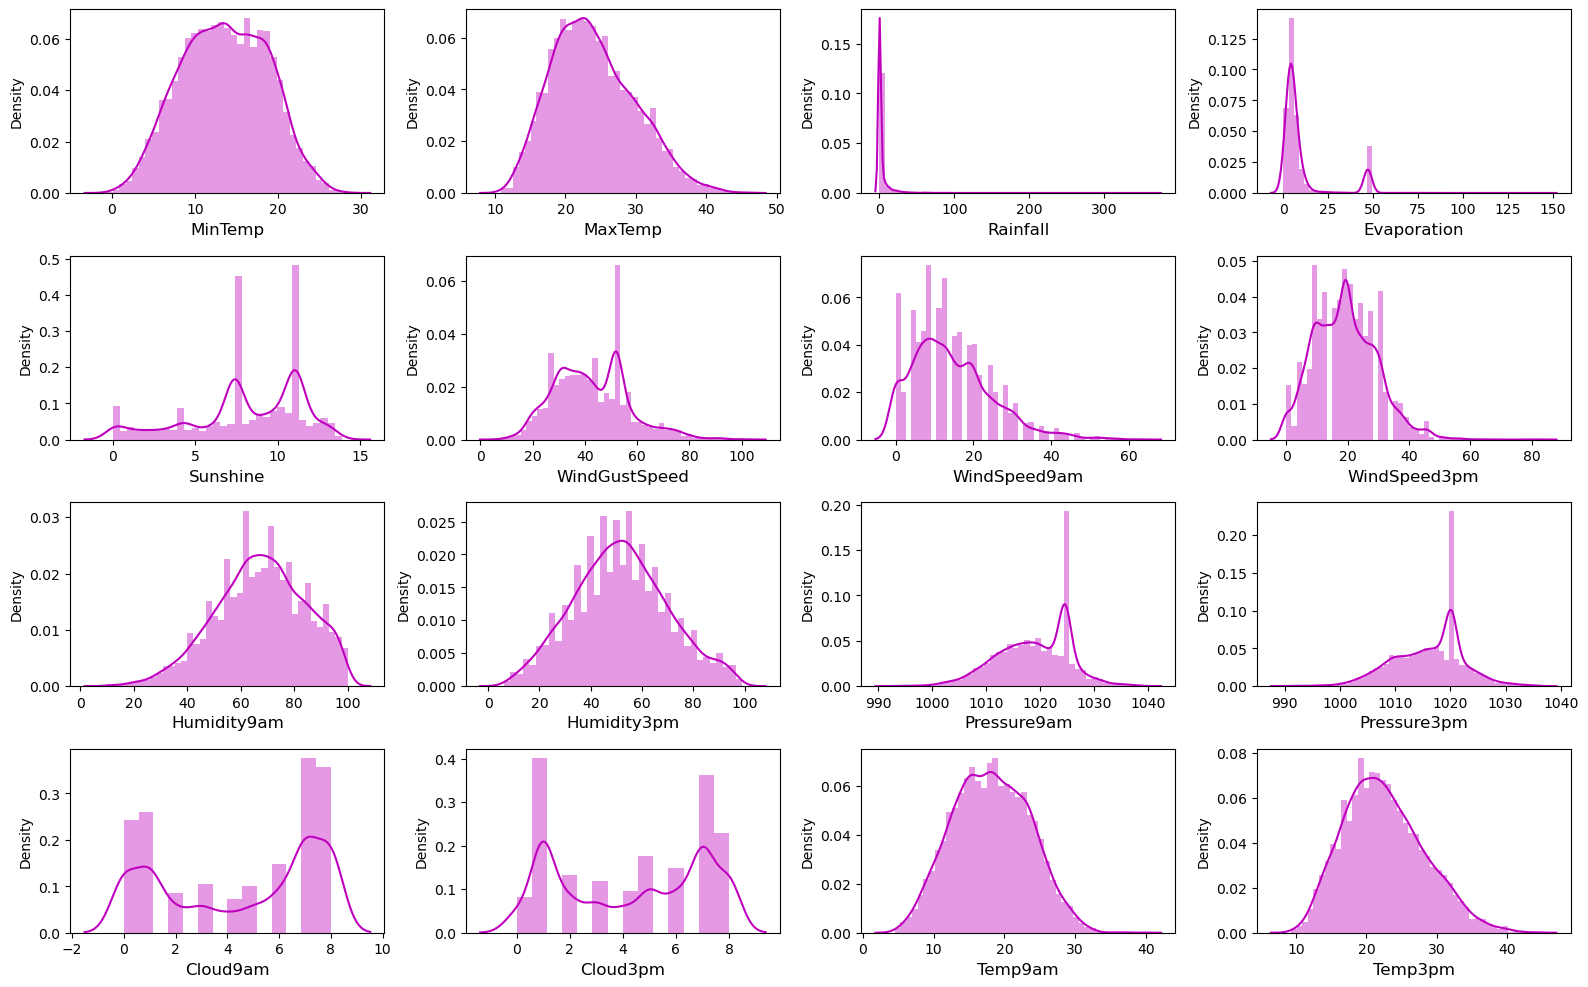

In [201]:
plt.figure(figsize=(16,12))
plotnumber=1
for i in num_cols.columns:
    if plotnumber<=16:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(num_cols[i],color='m')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [202]:
num_cols.skew()

MinTemp          -0.022304
MaxTemp           0.440142
Rainfall         12.957307
Evaporation       2.401235
Sunshine         -0.747544
WindGustSpeed     0.489863
WindSpeed9am      0.909913
WindSpeed3pm      0.459591
Humidity9am      -0.258475
Humidity3pm       0.123817
Pressure9am      -0.363186
Pressure3pm      -0.316356
Cloud9am         -0.301769
Cloud3pm         -0.114835
Temp9am           0.074086
Temp3pm           0.435249
dtype: float64

# Data Cleaning

# Removing the Outliers

In [203]:
#removing the outliers by Z-Score method
from scipy.stats import zscore
z=np.abs(zscore(num_cols))
z

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
907   1.209395  0.530575  2.005119     0.091005  0.258408       0.520432   
908   0.995849  0.274851  0.364539     0.440369  1.382222       0.660906   
909   0.568757  0.257803  1.296687     0.513153  0.591204       1.644221   
910   0.957023  0.496478  0.269321     0.484039  0.844347       0.871616   
911   0.898783  0.718105  0.269321     0.222017  0.258408       0.533119   
...        ...       ...       ...          ...       ...            ...   
8420  2.090864  0.100210  0.269321     0.309358  0.141220       0.801380   
8421  1.935558  0.223706  0.269321     0.309358  0.141220       1.433511   
8422  1.586119  0.496478  0.269321     0.309358  0.141220       0.379959   
8423  1.120200  0.513526  0.269321     0.309358  0.141220       1.012090   
8424  0.258144  0.513526  0.269321     0.309358  0.141220       1.012090   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
907       0.245791      0.283097     0.942370     0.455607     0.006111   
908       0.245791      0.612621     1.062460     2.103577     0.274848   
909       0.822729      1.010718     1.002415     0.730269     0.394287   
910       0.725590      0.084049     0.041691     0.455607     0.006111   
911       0.142761      1.576912     0.018354     0.895066     0.382066   
...            ...           ...          ...          ...          ...   
8420      0.142761      0.811669     0.979077     1.521958     0.857113   
8421      0.142761      1.010718     0.678851     1.686755     0.692884   
8422      0.531314      1.010718     0.858987     1.521958     0.319638   
8423      0.142761      1.209766     0.979077     1.521958     0.080760   
8424      0.245791      0.214524     0.318580     0.862770     0.200199   

      Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
907      0.280008  0.487711  0.613789  0.717057  0.603863  
908      0.624840  0.173714  0.979292  0.530833  0.288694  
909      0.624840  0.156998  0.979292  0.530833  0.341346  
910      0.076244  0.835139  0.248287  0.959150  0.673867  
911      0.519374  1.165851  1.213723  1.089507  0.586361  
...           ...       ...       ...       ...       ...  
8420     0.656188  1.149135  0.979292  1.499019  0.026177  
8421     0.468098  1.149135  0.979292  1.350039  0.341346  
8422     0.107593  1.149135  0.979292  1.052079  0.621364  
8423     0.060570  0.504427  0.848220  0.567894  0.603863  
8424     0.280008  1.149135  1.344794  0.586517  0.288694  

[7518 rows x 16 columns]

In [204]:
threshold=3
print(np.where(z>3))

(array([  21,   22,   28,   42,   72,   73,   73,   73,  101,  102,  104,
        231,  241,  242,  244,  282,  296,  330,  334,  357,  358,  450,
        504,  505,  572,  573,  574,  606,  628,  680,  737,  754,  758,
        766,  773,  867,  912,  991,  996, 1038, 1109, 1121, 1136, 1167,
       1201, 1209, 1279, 1294, 1312, 1312, 1323, 1324, 1358, 1522, 1581,
       1598, 1620, 1620, 1634, 1686, 1769, 1770, 1828, 1942, 1946, 1952,
       1952, 1983, 1991, 1993, 1994, 2002, 2096, 2144, 2144, 2152, 2159,
       2160, 2160, 2160, 2161, 2175, 2175, 2175, 2182, 2182, 2192, 2192,
       2234, 2260, 2265, 2271, 2299, 2305, 2305, 2341, 2341, 2351, 2364,
       2364, 2370, 2370, 2371, 2371, 2384, 2384, 2394, 2394, 2395, 2395,
       2396, 2443, 2512, 2514, 2523, 2542, 2542, 2542, 2542, 2543, 2543,
       2551, 2650, 2664, 2695, 2696, 2700, 2714, 2794, 2798, 2804, 2804,
       2835, 2843, 2845, 2846, 2854, 2948, 2996, 2996, 3004, 3011, 3012,
       3012, 3012, 3013, 3027, 3027, 3027, 3034, 3

In [205]:
df_new=num_cols[(z<3).all(axis=1)]
df_new

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
907      19.8     27.1      24.4          8.6       9.0           35.0   
908      18.7     25.6       6.8          3.8       3.4           33.0   
909      16.5     25.5      16.8          2.8       6.1           19.0   
910      18.5     26.9       0.0          3.2      11.0           30.0   
911      18.2     28.2       0.0          6.8       9.0           50.0   
...       ...      ...       ...          ...       ...            ...   
8420      2.8     23.4       0.0          5.6       8.6           31.0   
8421      3.6     25.3       0.0          5.6       8.6           22.0   
8422      5.4     26.9       0.0          5.6       8.6           37.0   
8423      7.8     27.0       0.0          5.6       8.6           28.0   
8424     14.9     27.0       0.0          5.6       8.6           28.0   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
907           17.0          22.0         83.0         60.0       1018.9   
908           17.0          13.0         85.0         90.0       1020.7   
909            6.0           9.0         84.0         65.0       1021.5   
910            7.0          20.0         68.0         60.0       1018.9   
911           13.0          35.0         67.0         68.0       1016.3   
...            ...           ...          ...          ...          ...   
8420          13.0          11.0         51.0         24.0       1024.6   
8421          13.0           9.0         56.0         21.0       1023.5   
8422           9.0           9.0         53.0         24.0       1021.0   
8423          13.0           7.0         51.0         24.0       1019.4   
8424          17.0          17.0         62.0         36.0       1020.2   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
907        1017.9       6.0       6.0     22.0     26.0  
908        1020.1       4.0       7.0     21.0     20.9  
909        1020.1       5.0       7.0     21.0     24.5  
910        1016.6       2.0       5.0     23.3     26.4  
911        1012.8       1.0       1.0     24.0     25.9  
...           ...       ...       ...      ...      ...  
8420       1020.3       8.0       7.0     10.1     22.4  
8421       1019.1       8.0       7.0     10.9     24.5  
8422       1016.8       8.0       7.0     12.5     26.1  
8423       1016.5       3.0       2.0     15.1     26.0  
8424       1017.9       8.0       8.0     15.0     20.9  

[7215 rows x 16 columns]

In [206]:
df_new.shape

(7215, 16)

303 ROWS ARE REMOVED AS OUTLIERS

In [207]:
cat_cols.shape

(7518, 7)

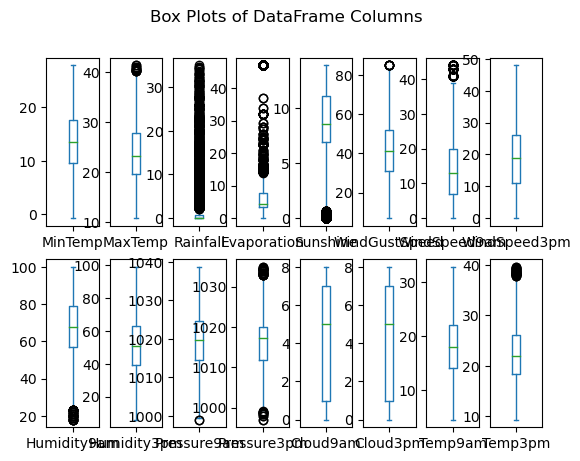

In [208]:
plt.figure
df_new.plot(kind='box',subplots=True,layout=(2,8))
plt.suptitle("Box Plots of DataFrame Columns")
plt.tight_layout()
plt.show()

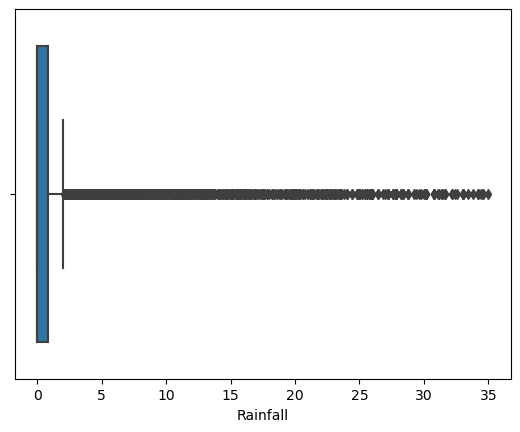

In [209]:
sns.boxplot(df_new['Rainfall'])
plt.show()

In [210]:
df_new.skew()

MinTemp         -0.019183
MaxTemp          0.362715
Rainfall         3.444371
Evaporation      2.264569
Sunshine        -0.768605
WindGustSpeed    0.316321
WindSpeed9am     0.664066
WindSpeed3pm     0.311690
Humidity9am     -0.228923
Humidity3pm      0.137059
Pressure9am     -0.300105
Pressure3pm     -0.230258
Cloud9am        -0.287431
Cloud3pm        -0.094597
Temp9am          0.039185
Temp3pm          0.358653
dtype: float64

In [211]:
df_new.drop(['Rainfall', 'Evaporation', 'Sunshine'], axis=1,inplace =True)

From the above observations we conclude that 'Rainfall','Evaporation','Sunshine' had huge outliers, now they have huge outliers, and skewness to they arnt even contributing to our target variables too so we will drop the columns

In [212]:
df_new.skew()

MinTemp         -0.019183
MaxTemp          0.362715
WindGustSpeed    0.316321
WindSpeed9am     0.664066
WindSpeed3pm     0.311690
Humidity9am     -0.228923
Humidity3pm      0.137059
Pressure9am     -0.300105
Pressure3pm     -0.230258
Cloud9am        -0.287431
Cloud3pm        -0.094597
Temp9am          0.039185
Temp3pm          0.358653
dtype: float64

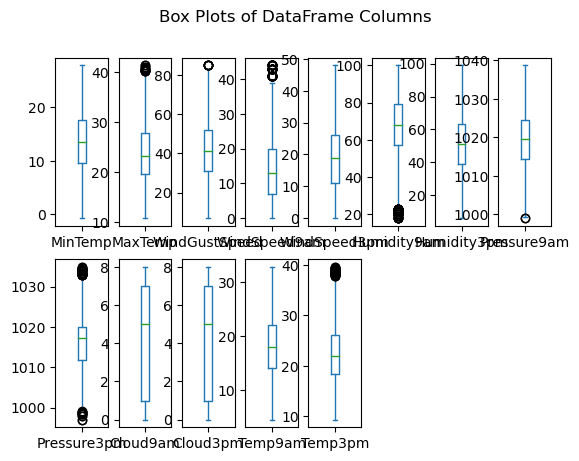

In [213]:
plt.figure
df_new.plot(kind='box',subplots=True,layout=(2,8))
plt.suptitle("Box Plots of DataFrame Columns")
plt.tight_layout()
plt.show()

# Encoding Categorical Columns

In [214]:
from sklearn.preprocessing import LabelEncoder
cat_cols.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    cat_cols[col] = le.fit_transform(cat_cols[col])
    label_encoders[col] = le

In [215]:
cat_cols.dtypes

Date            int32
Location        int32
WindGustDir     int32
WindDir9am      int32
WindDir3pm      int32
RainToday       int32
RainTomorrow    int32
dtype: object

# CONCATINATING numerical column and Categorical Columns

In [216]:
df1=pd.merge(df_new,cat_cols,left_index=True,right_index=True)

In [217]:
df1

MinTemp  MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
907      19.8     27.1           35.0          17.0          22.0   
908      18.7     25.6           33.0          17.0          13.0   
909      16.5     25.5           19.0           6.0           9.0   
910      18.5     26.9           30.0           7.0          20.0   
911      18.2     28.2           50.0          13.0          35.0   
...       ...      ...            ...           ...           ...   
8420      2.8     23.4           31.0          13.0          11.0   
8421      3.6     25.3           22.0          13.0           9.0   
8422      5.4     26.9           37.0           9.0           9.0   
8423      7.8     27.0           28.0          13.0           7.0   
8424     14.9     27.0           28.0          17.0          17.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
907          83.0         60.0       1018.9       1017.9       6.0       6.0   
908          85.0         90.0       1020.7       1020.1       4.0       7.0   
909          84.0         65.0       1021.5       1020.1       5.0       7.0   
910          68.0         60.0       1018.9       1016.6       2.0       5.0   
911          67.0         68.0       1016.3       1012.8       1.0       1.0   
...           ...          ...          ...          ...       ...       ...   
8420         51.0         24.0       1024.6       1020.3       8.0       7.0   
8421         56.0         21.0       1023.5       1019.1       8.0       7.0   
8422         53.0         24.0       1021.0       1016.8       8.0       7.0   
8423         51.0         24.0       1019.4       1016.5       3.0       2.0   
8424         62.0         36.0       1020.2       1017.9       8.0       8.0   

      Temp9am  Temp3pm  Date  Location  WindGustDir  WindDir9am  WindDir3pm  \
907      22.0     26.0    99         2            2          12           2   
908      21.0     20.9   100         2            0          12           8   
909      21.0     24.5   101         2           15          15           2   
910      23.3     26.4   102         2            1          12           1   
911      24.0     25.9   103         2            5           6           4   
...       ...      ...   ...       ...          ...         ...         ...   
8420     10.1     22.4  2999         8            0           9           1   
8421     10.9     24.5  3000         8            6           9           3   
8422     12.5     26.1  3001         8            3           9          14   
8423     15.1     26.0  3002         8            9          10           3   
8424     15.0     20.9  3003         8            9           2           2   

      RainToday  RainTomorrow  
907           1             1  
908           1             1  
909           1             0  
910           0             0  
911           0             1  
...         ...           ...  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             0  

[7215 rows x 20 columns]

In [218]:
df1.shape

(7215, 20)

In [219]:
df1.shape

(7215, 20)

In [220]:
df1.dtypes

MinTemp          float64
MaxTemp          float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
Date               int32
Location           int32
WindGustDir        int32
WindDir9am         int32
WindDir3pm         int32
RainToday          int32
RainTomorrow       int32
dtype: object

# Separating Lables and Features

In [221]:
x=df1.drop('RainTomorrow',axis=1)
y=df1['RainTomorrow']

In [222]:
x

MinTemp  MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
907      19.8     27.1           35.0          17.0          22.0   
908      18.7     25.6           33.0          17.0          13.0   
909      16.5     25.5           19.0           6.0           9.0   
910      18.5     26.9           30.0           7.0          20.0   
911      18.2     28.2           50.0          13.0          35.0   
...       ...      ...            ...           ...           ...   
8420      2.8     23.4           31.0          13.0          11.0   
8421      3.6     25.3           22.0          13.0           9.0   
8422      5.4     26.9           37.0           9.0           9.0   
8423      7.8     27.0           28.0          13.0           7.0   
8424     14.9     27.0           28.0          17.0          17.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
907          83.0         60.0       1018.9       1017.9       6.0       6.0   
908          85.0         90.0       1020.7       1020.1       4.0       7.0   
909          84.0         65.0       1021.5       1020.1       5.0       7.0   
910          68.0         60.0       1018.9       1016.6       2.0       5.0   
911          67.0         68.0       1016.3       1012.8       1.0       1.0   
...           ...          ...          ...          ...       ...       ...   
8420         51.0         24.0       1024.6       1020.3       8.0       7.0   
8421         56.0         21.0       1023.5       1019.1       8.0       7.0   
8422         53.0         24.0       1021.0       1016.8       8.0       7.0   
8423         51.0         24.0       1019.4       1016.5       3.0       2.0   
8424         62.0         36.0       1020.2       1017.9       8.0       8.0   

      Temp9am  Temp3pm  Date  Location  WindGustDir  WindDir9am  WindDir3pm  \
907      22.0     26.0    99         2            2          12           2   
908      21.0     20.9   100         2            0          12           8   
909      21.0     24.5   101         2           15          15           2   
910      23.3     26.4   102         2            1          12           1   
911      24.0     25.9   103         2            5           6           4   
...       ...      ...   ...       ...          ...         ...         ...   
8420     10.1     22.4  2999         8            0           9           1   
8421     10.9     24.5  3000         8            6           9           3   
8422     12.5     26.1  3001         8            3           9          14   
8423     15.1     26.0  3002         8            9          10           3   
8424     15.0     20.9  3003         8            9           2           2   

      RainToday  
907           1  
908           1  
909           1  
910           0  
911           0  
...         ...  
8420          0  
8421          0  
8422          0  
8423          0  
8424          0  

[7215 rows x 19 columns]

In [223]:
x.shape

(7215, 19)

In [224]:
y

907     1
908     1
909     0
910     0
911     1
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 7215, dtype: int32

In [225]:
y.shape

(7215,)

In [226]:
y.value_counts()

0    5491
1    1724
Name: RainTomorrow, dtype: int64

# Dealing with Class Imbalance

Feature Scaling using Standard Scalarization

In [227]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

MinTemp   MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     1.222675  0.555609      -0.493476      0.323537      0.335308   
1     1.009482  0.294321      -0.642298      0.323537     -0.598565   
2     0.583098  0.276901      -1.684056     -0.827508     -1.013619   
3     0.970720  0.520770      -0.865532     -0.722868      0.127781   
4     0.912577  0.747220       0.622693     -0.095025      1.684236   
...        ...       ...            ...           ...           ...   
7210 -2.072112 -0.088902      -0.791121     -0.095025     -0.806092   
7211 -1.917063  0.242063      -1.460822     -0.095025     -1.013619   
7212 -1.568203  0.520770      -0.344653     -0.513587     -1.013619   
7213 -1.103057  0.538189      -1.014355     -0.095025     -1.221147   
7214  0.273001  0.538189      -1.014355      0.323537     -0.183510   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0        0.952163     0.461911    -0.025422     0.258480  0.498232  0.629757   
1        1.074730     2.140030     0.252554     0.616054 -0.163418  0.995829   
2        1.013446     0.741598     0.376099     0.616054  0.167407  0.995829   
3        0.032914     0.461911    -0.025422     0.047186 -0.825067  0.263684   
4       -0.028370     0.909409    -0.426942    -0.570443 -1.155892 -1.200607   
...           ...          ...          ...          ...       ...       ...   
7210    -1.008902    -1.551832     0.854835     0.648561  1.159881  0.995829   
7211    -0.702486    -1.719644     0.684961     0.453520  1.159881  0.995829   
7212    -0.886336    -1.551832     0.298883     0.079692  1.159881  0.995829   
7213    -1.008902    -1.551832     0.051794     0.030932 -0.494243 -0.834534   
7214    -0.334786    -0.880584     0.175339     0.258480  1.159881  1.361902   

       Temp9am   Temp3pm      Date  Location  WindGustDir  WindDir9am  \
0     0.736698  0.627196 -1.545393 -1.215570    -1.182065    0.928388   
1     0.549170 -0.284163 -1.544204 -1.215570    -1.624065    0.928388   
2     0.549170  0.359149 -1.543015 -1.215570     1.690931    1.594423   
3     0.980486  0.698675 -1.541827 -1.215570    -1.403065    0.928388   
4     1.111756  0.609326 -1.540638 -1.215570    -0.519066   -0.403683   
...        ...       ...       ...       ...          ...         ...   
7210 -1.494894 -0.016116  1.901559  0.934637    -1.624065    0.262352   
7211 -1.344871  0.359149  1.902747  0.934637    -0.298066    0.262352   
7212 -1.044825  0.645066  1.903936  0.934637    -0.961065    0.262352   
7213 -0.557250  0.627196  1.905124  0.934637     0.364933    0.484364   
7214 -0.576003 -0.284163  1.906313  0.934637     0.364933   -1.291730   

      WindDir3pm  RainToday  
0      -1.272539   1.789440  
1       0.080348   1.789440  
2      -1.272539   1.789440  
3      -1.498020  -0.558834  
4      -0.821577  -0.558834  
...          ...        ...  
7210   -1.498020  -0.558834  
7211   -1.047058  -0.558834  
7212    1.433235  -0.558834  
7213   -1.047058  -0.558834  
7214   -1.272539  -0.558834  

[7215 rows x 19 columns]

In [228]:
x.shape

(7215, 19)

In [229]:
y.shape

(7215,)

# Checking for Multicolinearity

# Checking Variance Inflation Factor(VIF)

In [230]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
vif['Features']=x.columns

vif

VIF values       Features
0     7.289457        MinTemp
1    23.247849        MaxTemp
2     1.663854  WindGustSpeed
3     1.923575   WindSpeed9am
4     1.771248   WindSpeed3pm
5     3.783416    Humidity9am
6     5.372208    Humidity3pm
7    21.425794    Pressure9am
8    19.643002    Pressure3pm
9     1.706639       Cloud9am
10    1.682437       Cloud3pm
11   16.030385        Temp9am
12   30.034161        Temp3pm
13    1.452633           Date
14    1.357635       Location
15    1.702446    WindGustDir
16    1.360882     WindDir9am
17    1.472973     WindDir3pm
18    1.312482      RainToday

In [231]:
X=x.drop(['MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm'],axis=1,inplace=True)

In [232]:
vif=pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
vif['Features']=x.columns

vif

VIF values       Features
0     1.156252        MinTemp
1     1.569210  WindGustSpeed
2     1.740336   WindSpeed9am
3     1.660897   WindSpeed3pm
4     2.169767    Humidity9am
5     2.115755    Humidity3pm
6     1.609966       Cloud9am
7     1.668036       Cloud3pm
8     1.329711           Date
9     1.342279       Location
10    1.603789    WindGustDir
11    1.308223     WindDir9am
12    1.437232     WindDir3pm
13    1.271390      RainToday

After dropping the columns 'MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm' we dont have any multicolinearity present in the dataset

# Feature Scalling

In [235]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [243]:
# Fit the scaler to the training data
scaler.fit(x_train)

StandardScaler()

# Spliting the data for training and testing

In [237]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=43)

In [238]:
x_train.shape

(5050, 14)

In [239]:
x_test.shape

(2165, 14)

In [240]:
y_train.shape

(5050,)

In [241]:
y_test.shape

(2165,)

# Feature Scalling

In [242]:
# Fit the scaler to the training data
scaler.fit(x_train)

StandardScaler()

In [244]:
# Transform the training and testing data
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Model Building

# Finding the best random state

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size = 0.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('Best accuracy is', maxAccu, 'at random_state', maxRS)

NameError: name 'x_resampled' is not defined

In [246]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [247]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
bc=BaggingClassifier()
et=ExtraTreesClassifier()

In [249]:
print('Accuracy score, Confusion Matrix and Classification report for different Models')
print('\n')
models=[lg,gnb,svc,dtc,knn,add,rf,gb,bc,et]
best_accuracy=0
best_model=None
for m in models:
    x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.30,random_state=9)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    
    
    #Evaluate the model
    accuracy=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(round((accuracy_score(y_test,pred)),3))
    print('Confusion Matrix of',m)
    print(confusion_matrix(y_test,pred))
    print('Classification Report of',m)
    print(classification_report(y_test,pred))
    print('\n')
    
    if accuracy>best_accuracy:
        best_model=m
        best_accuracy=accuracy
        best_pred=pred
        
print('\nBest Performing Model:',best_model)
print('Accuracy Score:',round(best_accuracy,3))

Accuracy score, Confusion Matrix and Classification report for different Models




NameError: name 'x_resampled' is not defined

In [ ]:
-hgiuu